In [1]:
import glob
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN

# UMA with speed at 22.22 m/s

Read and generate dataframe with Pandas

In [2]:
traj01 = pd.read_csv('UE0_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE0_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE1_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE1_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE2_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE2_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE3_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE3_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE4_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE4_18-11-2021_23-38-11.csv', low_memory=False,  header=None)

In [3]:
traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]


Plot sample routes

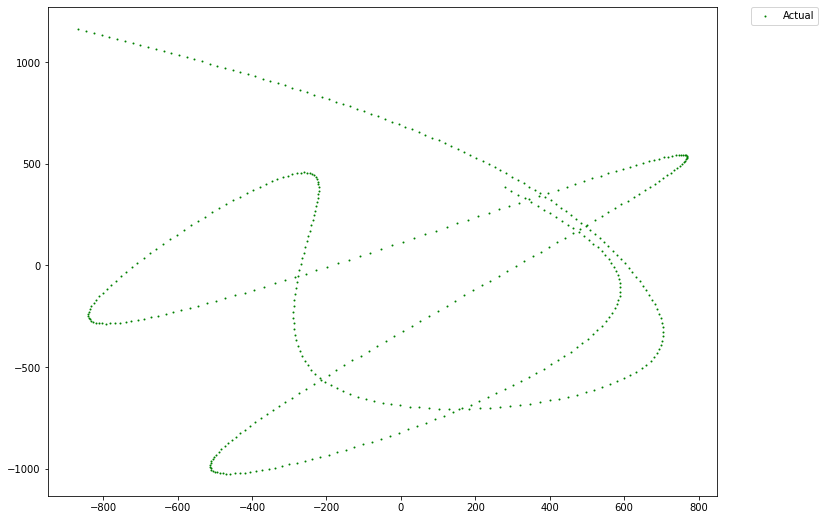

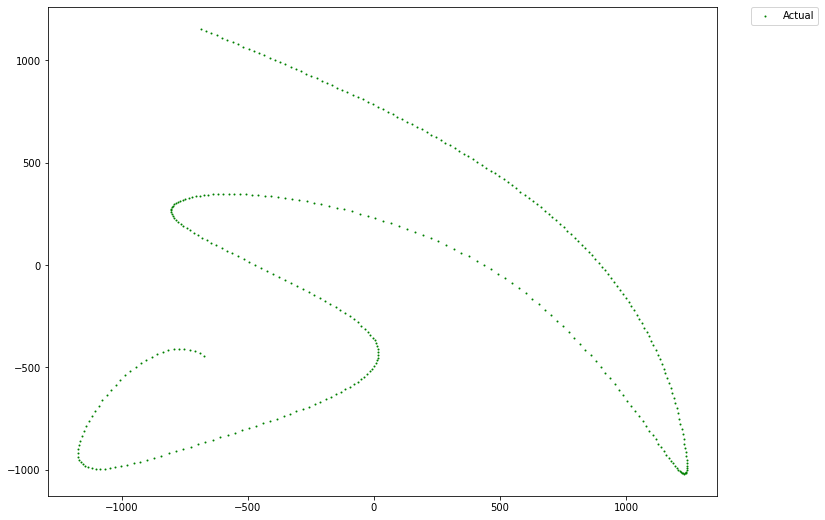

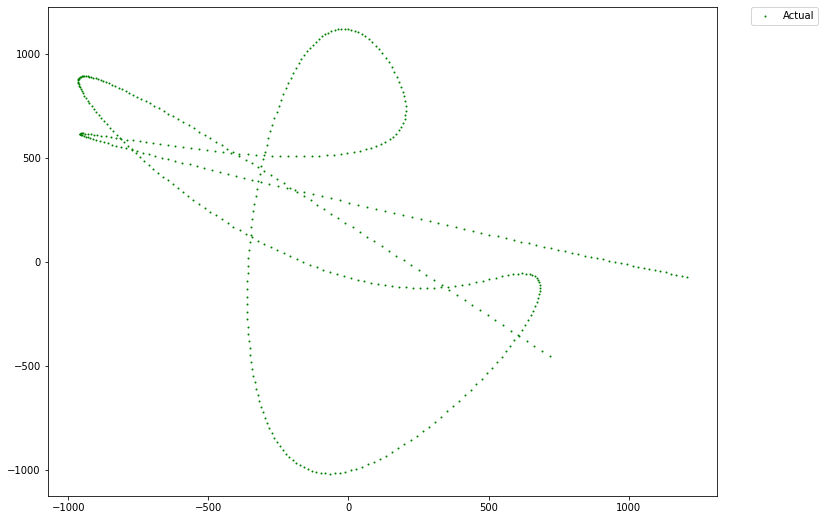

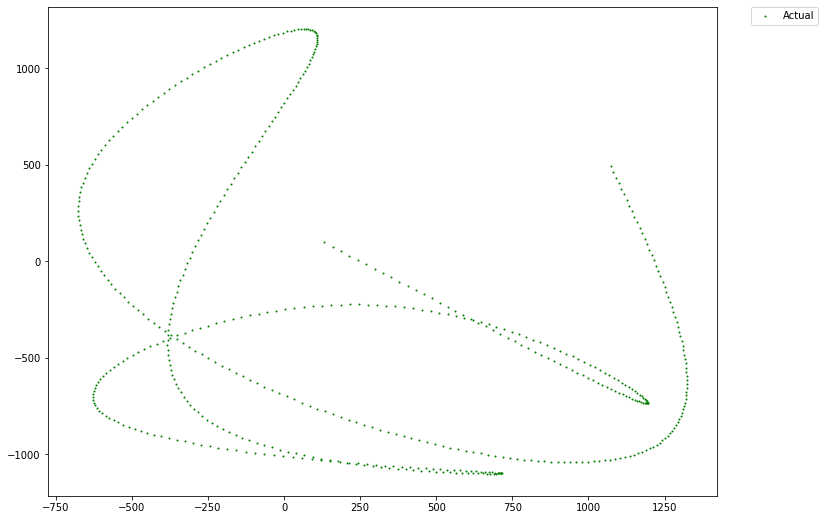

In [4]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj03['X'],traj03['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj06['X'],traj06['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj10['X'],traj10['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Transform the X and Y position of the data into time series problem corresponding the supervise learning problem and then scale it in the range of -1 to 1.

In [5]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 1, 1)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 1, 1)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 1, 1)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 1, 1)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000   1.000000 -0.974398  0.990944
2  -0.974398   0.990944 -0.948799  0.981885
3  -0.948799   0.981885 -0.923207  0.972821
4  -0.923207   0.972821 -0.897626  0.963747
5  -0.897626   0.963747 -0.872060  0.954661
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.966739 -0.995142
2   0.966739  -0.995142  0.933490 -0.990278
3   0.933490  -0.990278  0.900268 -0.985404
4   0.900268  -0.985404  0.867084 -0.980514
5   0.867084  -0.980514  0.833951 -0.975604
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.596960   1.000000 -0.579516  0.990049
2  -0.579516   0.990049 -0.562075  0.980097
3  -0.562075   0.980097 -0.544637  0.970140
4  -0.544637   0.970140 -0.527204  0.960179
5  -0.527204   0.960179 -0.509779  0.950209
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -0.697563 -0.970668 -0.706060
2  -0.970668  -0.706060 -0.941347 -0.714551
3  -0.941347  -0.714551 -0.912046 

Concatenate all reframed into 1 reframed

In [7]:
frames = [reframed, reframed_2, reframed_3,reframed_4,reframed_5,reframed_6,reframed_7,reframed_8,reframed_9,reframed_10]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

,var1(t-1),var2(t-1),var1(t),var2(t)
5249,0.793571,0.255532,0.784823,0.280756
5250,0.784823,0.280756,0.776034,0.306016
5251,0.776034,0.306016,0.767212,0.331303
5252,0.767212,0.331303,0.758368,0.356608
5253,0.758368,0.356608,0.749511,0.381925


Split test and train dataset

In [8]:
# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, 2:]
test_X, test_y = test[:, :-2], test[:, 2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1051, 1, 2) (1051, 2) (4203, 1, 2) (4203, 2)


Fit dataset with Bi-LSTM

Epoch 1/600
15/15 - 16s - loss: 0.4185 - accuracy: 0.9182 - val_loss: 0.4519 - val_accuracy: 0.9486
Epoch 2/600
15/15 - 0s - loss: 0.3693 - accuracy: 0.9886 - val_loss: 0.3940 - val_accuracy: 0.9722
Epoch 3/600
15/15 - 0s - loss: 0.3162 - accuracy: 0.9867 - val_loss: 0.3281 - val_accuracy: 0.9767
Epoch 4/600
15/15 - 0s - loss: 0.2542 - accuracy: 0.9895 - val_loss: 0.2494 - val_accuracy: 0.9798
Epoch 5/600
15/15 - 0s - loss: 0.1805 - accuracy: 0.9886 - val_loss: 0.1537 - val_accuracy: 0.9803
Epoch 6/600
15/15 - 0s - loss: 0.0919 - accuracy: 0.9895 - val_loss: 0.0411 - val_accuracy: 0.9805
Epoch 7/600
15/15 - 0s - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.0248 - val_accuracy: 0.9914
Epoch 8/600
15/15 - 0s - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0234 - val_accuracy: 0.9879
Epoch 9/600
15/15 - 0s - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0175 - val_accuracy: 0.9879
Epoch 10/600
15/15 - 0s - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0184 - val_accuracy: 0.9898
Epoch 11

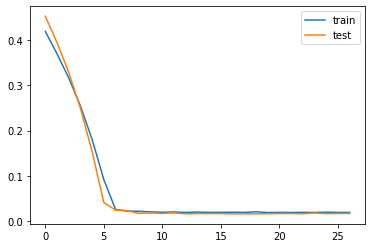

In [11]:
from keras.layers import Bidirectional

# design network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(Bidirectional(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]))))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Evaluate model with accuracy and loss metrics

In [12]:
yhat = model1.predict(test_X)
Loss, accuracy = model1.evaluate(test_X, test_y)
print('Accuracy: %.4f' % (accuracy*100))

# calculate Loss
print('Loss: %.6f' % Loss)

132/132 [==============================] - 0s 835us/step - loss: 0.0163 - accuracy: 0.9888
Accuracy: 98.8818
Loss: 0.016268


Generate predicted data from x test and x train dataset and test RMSE

In [13]:
# make a prediction
yhat = model1.predict(test_X)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)

# make a prediction
yhat2 = model1.predict(train_X)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmseL = rmse
print('Test RMSE: %.6f' % rmse)

# invert scaling for forecast
inv_yhat2 = scaler.inverse_transform(yhat2)
# invert scaling for actual
inv_y2 = scaler.inverse_transform(train_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Train RMSE: %.6f' % rmse)

import numpy as np
inv_f = np.concatenate((inv_yhat2, inv_yhat), axis=0)
inv_f

inv_o = np.concatenate((inv_y2, inv_y), axis=0)
inv_f,inv_o

Test RMSE: 18.180620
Train RMSE: 15.269469


(array([[-850.33575, 1154.0265 ],
        [-829.9105 , 1144.6854 ],
        [-809.4608 , 1135.3197 ],
        ...,
        [ 591.89844,  400.3628 ],
        [ 585.0089 ,  427.8312 ],
        [ 578.0888 ,  455.30945]], dtype=float32),
 array([[-846.06476, 1154.0919 ],
        [-825.13226, 1144.1808 ],
        [-804.20575, 1134.2628 ],
        ...,
        [ 578.0631 ,  432.3728 ],
        [ 570.8313 ,  460.05994],
        [ 563.58887,  487.75888]], dtype=float32))

Plot X and Y of actual and predicted data

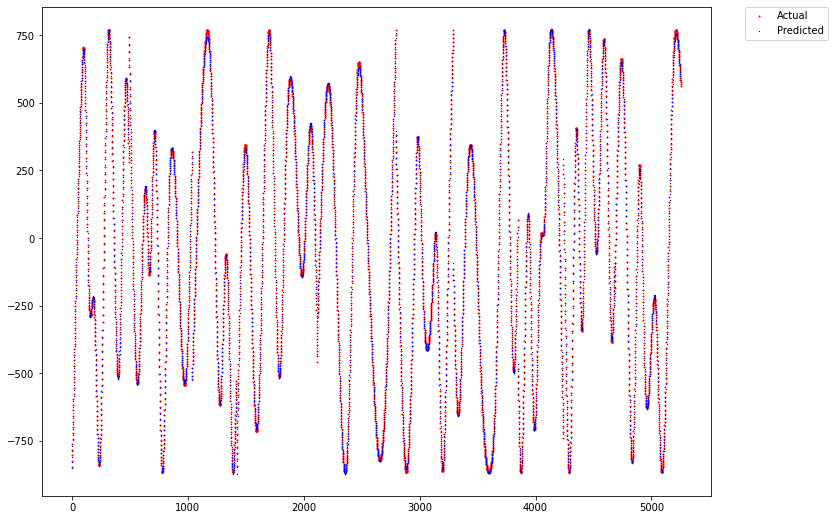

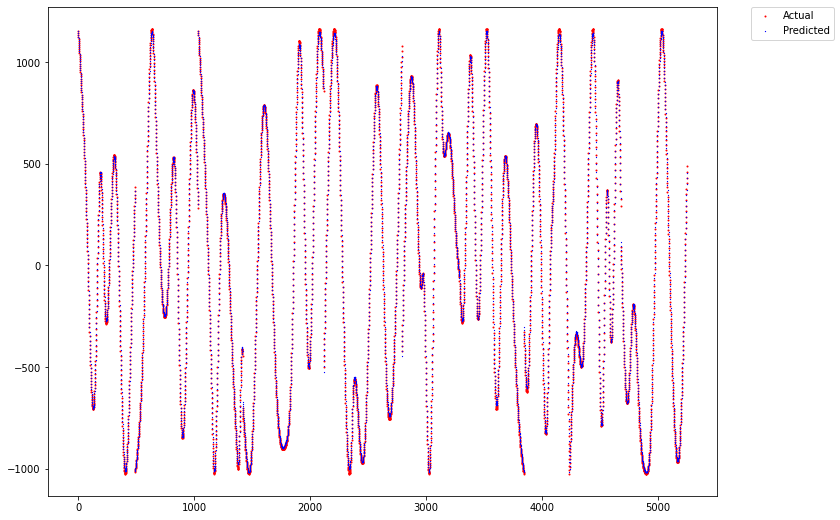

RMSE for X in Train dataset: 14.240374
RMSE for Y in Train dataset: 16.233461
RMSE for X in Test dataset: 16.341243
RMSE for Y in Test dataset: 19.850289


In [16]:
fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,0], inv_yhat2[:,0]))
print('RMSE for X in Train dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,1], inv_yhat2[:,1]))
print('RMSE for Y in Train dataset: %.6f' % rmse)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('RMSE for X in Test dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('RMSE for Y in Test dataset: %.6f' % rmse)

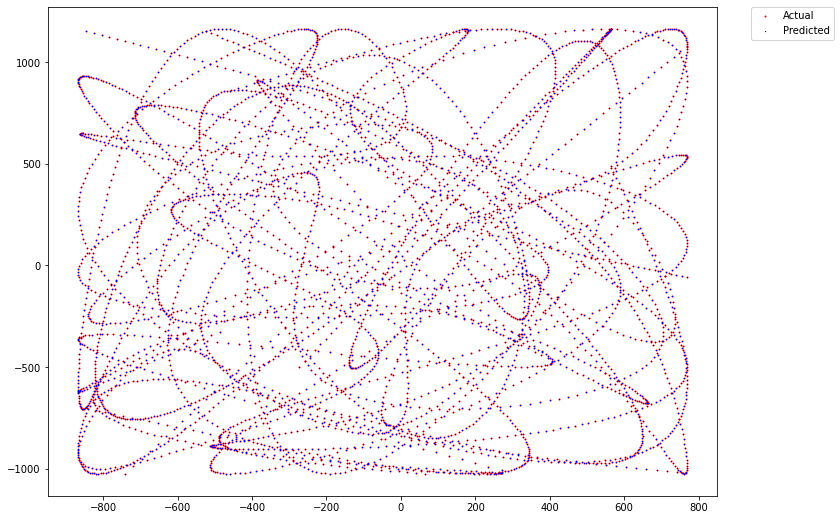

In [17]:

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Feed random 50 paths to ML for predicting

Read and generate dataframe

In [19]:
traj00 = pd.read_csv('UE0_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj01 = pd.read_csv('UE1_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE2_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE3_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE4_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE5_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE6_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE7_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE8_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE9_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE10_07-12-2021_20-27-58.csv', low_memory=False,  header=None)

traj11 = pd.read_csv('UE11_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj12 = pd.read_csv('UE12_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj13 = pd.read_csv('UE13_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj14 = pd.read_csv('UE14_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj15 = pd.read_csv('UE15_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj16 = pd.read_csv('UE16_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj17 = pd.read_csv('UE17_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj18 = pd.read_csv('UE18_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj19 = pd.read_csv('UE19_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj20 = pd.read_csv('UE20_07-12-2021_20-27-58.csv', low_memory=False,  header=None)

traj21 = pd.read_csv('UE21_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj22 = pd.read_csv('UE22_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj23 = pd.read_csv('UE23_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj24 = pd.read_csv('UE24_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj25 = pd.read_csv('UE25_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj26 = pd.read_csv('UE26_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj27 = pd.read_csv('UE27_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj28 = pd.read_csv('UE28_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj29 = pd.read_csv('UE29_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj30 = pd.read_csv('UE30_07-12-2021_20-27-58.csv', low_memory=False,  header=None)

traj31 = pd.read_csv('UE31_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj32 = pd.read_csv('UE32_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj33 = pd.read_csv('UE33_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj34 = pd.read_csv('UE34_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj35 = pd.read_csv('UE35_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj36 = pd.read_csv('UE36_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj37 = pd.read_csv('UE37_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj38 = pd.read_csv('UE38_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj39 = pd.read_csv('UE39_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj40 = pd.read_csv('UE40_07-12-2021_20-27-58.csv', low_memory=False,  header=None)

traj41 = pd.read_csv('UE41_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj42 = pd.read_csv('UE42_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj43 = pd.read_csv('UE43_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj44 = pd.read_csv('UE44_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj45 = pd.read_csv('UE45_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj46 = pd.read_csv('UE46_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj47 = pd.read_csv('UE47_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj48 = pd.read_csv('UE48_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj49 = pd.read_csv('UE49_07-12-2021_20-27-58.csv', low_memory=False,  header=None)
traj50 = pd.read_csv('UE50_07-12-2021_20-27-58.csv', low_memory=False,  header=None)




In [20]:
traj00.columns = ["X", "Y", "Speed", "Time"]
traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]
traj11.columns = ["X", "Y", "Speed", "Time"]
traj12.columns = ["X", "Y", "Speed", "Time"]
traj13.columns = ["X", "Y", "Speed", "Time"]
traj14.columns = ["X", "Y", "Speed", "Time"]
traj15.columns = ["X", "Y", "Speed", "Time"]
traj16.columns = ["X", "Y", "Speed", "Time"]
traj17.columns = ["X", "Y", "Speed", "Time"]
traj18.columns = ["X", "Y", "Speed", "Time"]
traj19.columns = ["X", "Y", "Speed", "Time"]
traj20.columns = ["X", "Y", "Speed", "Time"]
traj21.columns = ["X", "Y", "Speed", "Time"]
traj22.columns = ["X", "Y", "Speed", "Time"]
traj23.columns = ["X", "Y", "Speed", "Time"]
traj24.columns = ["X", "Y", "Speed", "Time"]
traj25.columns = ["X", "Y", "Speed", "Time"]
traj26.columns = ["X", "Y", "Speed", "Time"]
traj27.columns = ["X", "Y", "Speed", "Time"]
traj28.columns = ["X", "Y", "Speed", "Time"]
traj29.columns = ["X", "Y", "Speed", "Time"]
traj30.columns = ["X", "Y", "Speed", "Time"]
traj31.columns = ["X", "Y", "Speed", "Time"]
traj32.columns = ["X", "Y", "Speed", "Time"]
traj33.columns = ["X", "Y", "Speed", "Time"]
traj34.columns = ["X", "Y", "Speed", "Time"]
traj35.columns = ["X", "Y", "Speed", "Time"]
traj36.columns = ["X", "Y", "Speed", "Time"]
traj37.columns = ["X", "Y", "Speed", "Time"]
traj38.columns = ["X", "Y", "Speed", "Time"]
traj39.columns = ["X", "Y", "Speed", "Time"]
traj40.columns = ["X", "Y", "Speed", "Time"]
traj41.columns = ["X", "Y", "Speed", "Time"]
traj42.columns = ["X", "Y", "Speed", "Time"]
traj43.columns = ["X", "Y", "Speed", "Time"]
traj44.columns = ["X", "Y", "Speed", "Time"]
traj45.columns = ["X", "Y", "Speed", "Time"]
traj46.columns = ["X", "Y", "Speed", "Time"]
traj47.columns = ["X", "Y", "Speed", "Time"]
traj48.columns = ["X", "Y", "Speed", "Time"]
traj49.columns = ["X", "Y", "Speed", "Time"]
traj50.columns = ["X", "Y", "Speed", "Time"]


# First case: test with 1 predicted point 

Test only 1 predicted point and record 50 cases of 50 trajectories

Plot trajectory 1

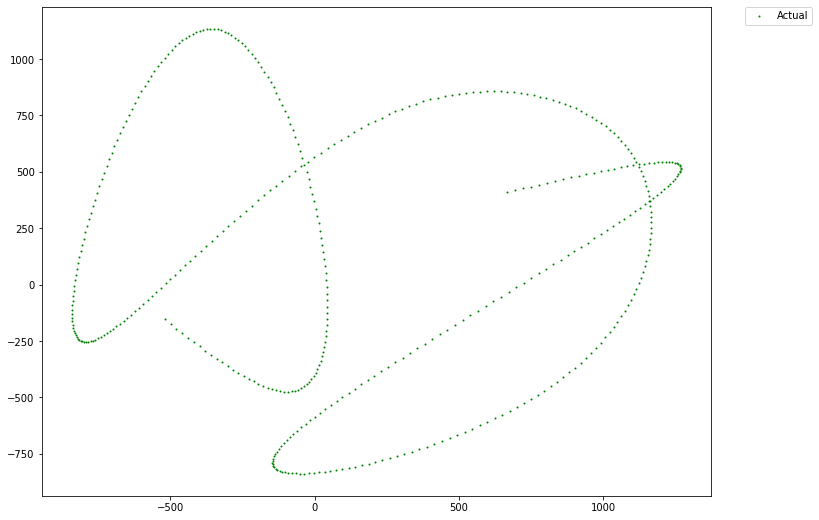

In [21]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

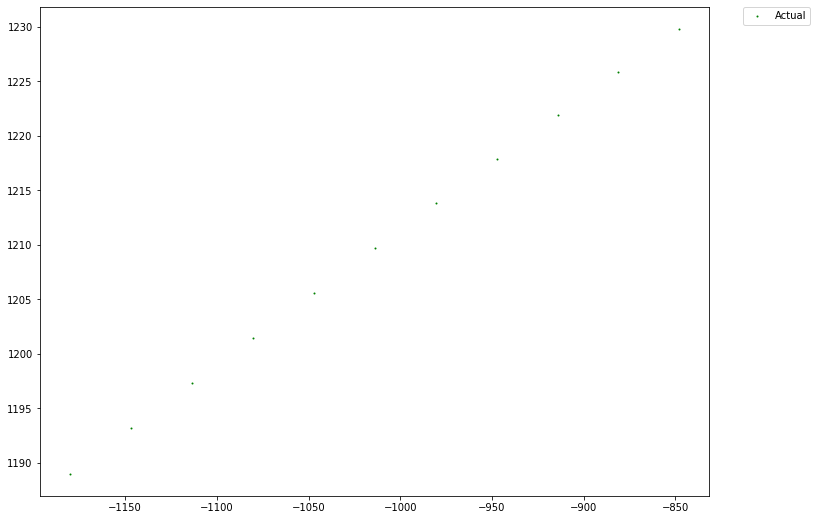

In [22]:
traj000 =traj00.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [23]:
traj01.iloc[0:2,:]

,X,Y,Speed,Time
0,-519.000000,-155.000000,0.000000,0
1,-498.641587,-175.267562,28.726974,1


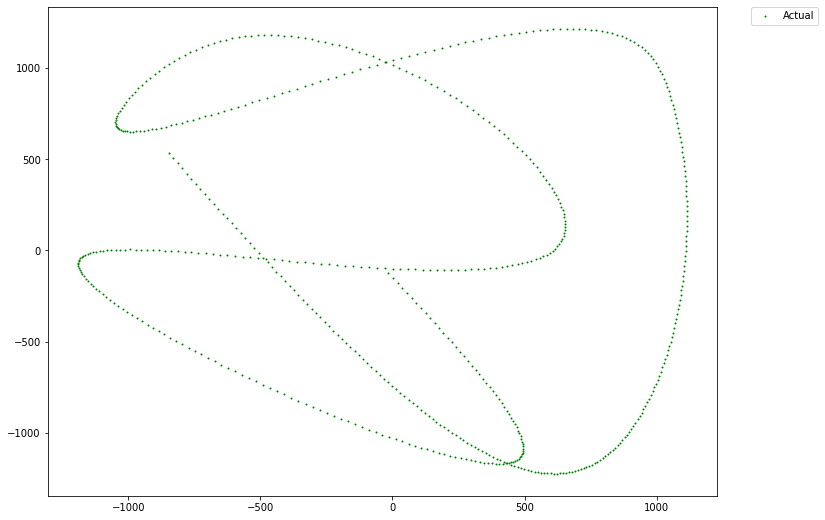

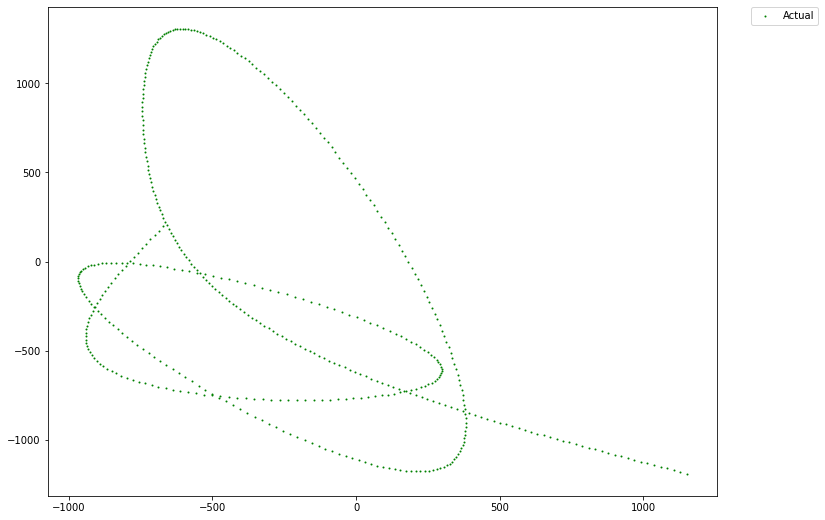

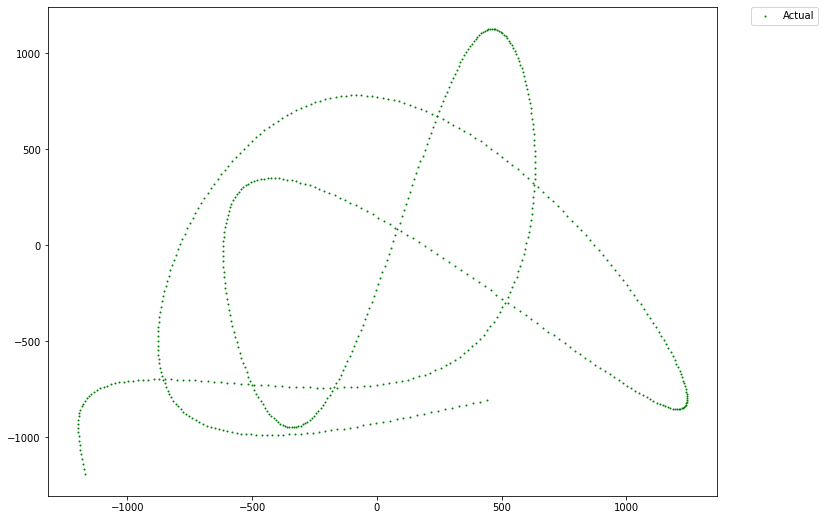

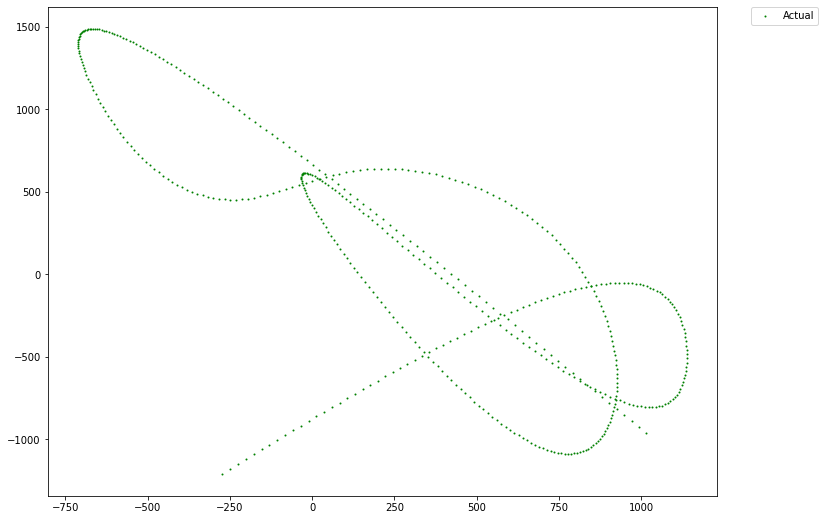

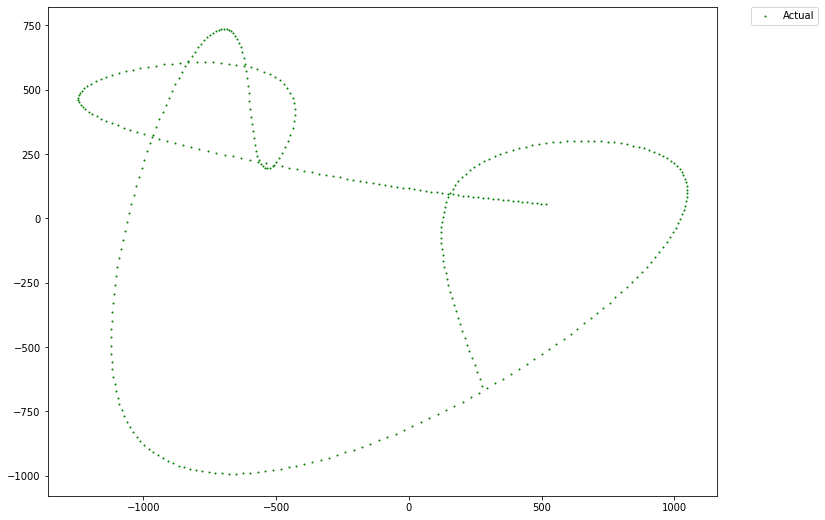

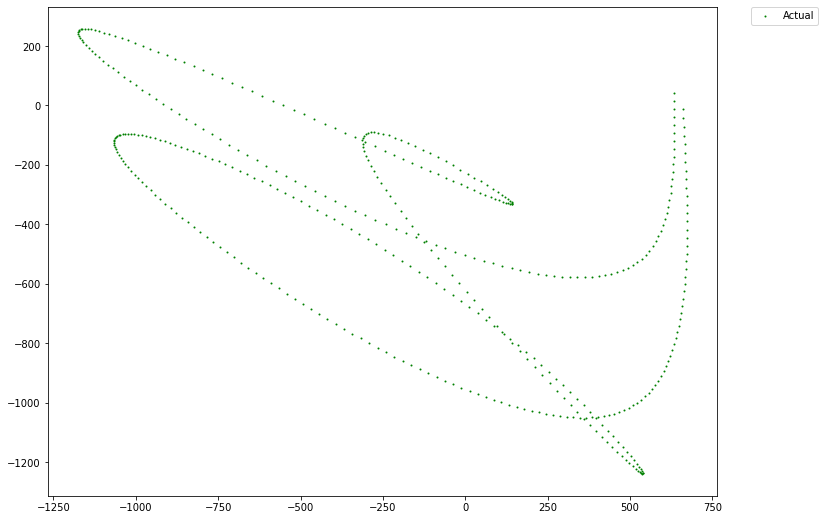

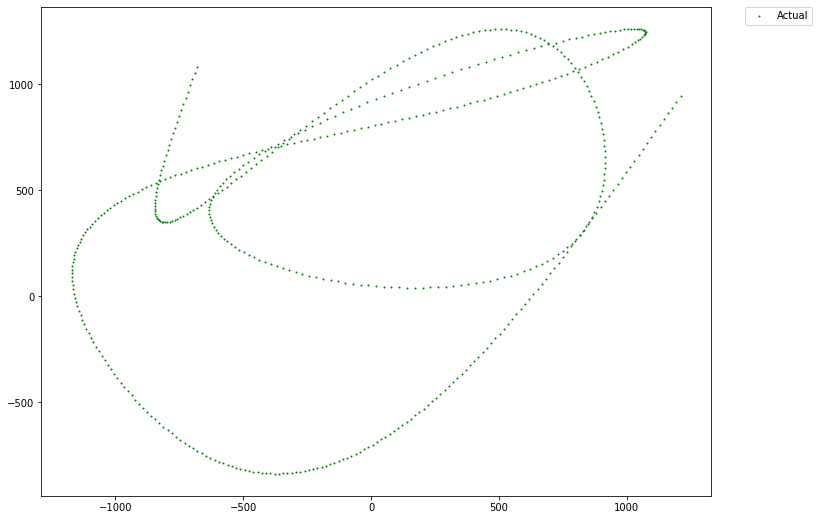

In [24]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj11['X'],traj11['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj12['X'],traj12['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj13['X'],traj13['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj14['X'],traj14['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj15['X'],traj15['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj16['X'],traj16['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj49['X'],traj49['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [25]:
traj00.iloc[0:2,:]

,X,Y,Speed,Time
0,-1180.000000,1189.000000,0.000000,0
1,-1146.705463,1193.160693,33.553503,1


In [26]:
new_df = traj00.iloc[0:2,:]


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0


Test RMSE: 23.778578


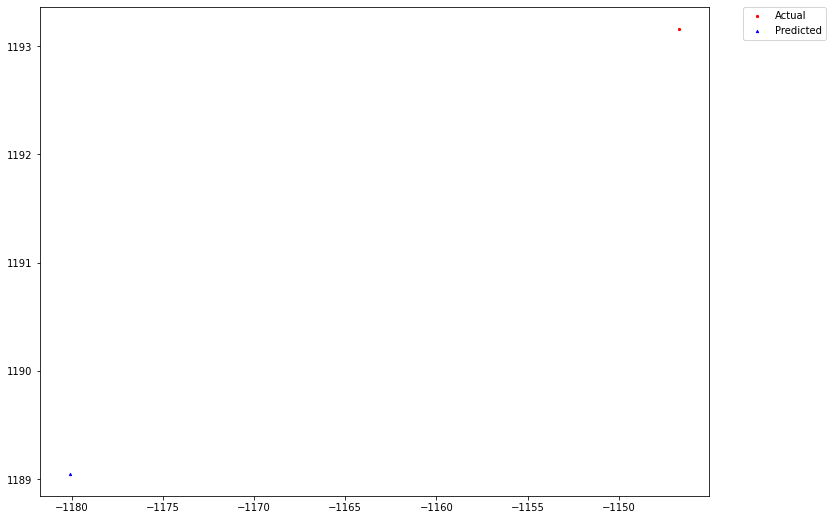

In [27]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [28]:
inv_o,inv_f

(array([[-1146.7054,  1193.1606]], dtype=float32),
 array([[-1180.0812,  1189.0494]], dtype=float32))

In [29]:
traj01.iloc[0:2,:]

,X,Y,Speed,Time
0,-519.000000,-155.000000,0.000000,0
1,-498.641587,-175.267562,28.726974,1


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0   0.999999      1.0     -1.0
Test RMSE: 20.163067


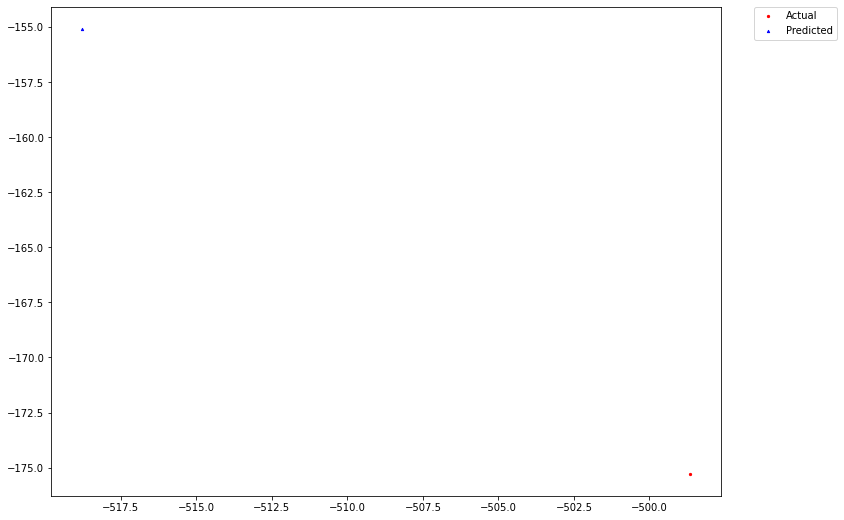

[[-498.6416  -175.26756]]
[[-518.79254 -155.09238]]


In [30]:
new_df = traj01.iloc[0:2,:]


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


In [31]:
traj02.iloc[0:2,:]

,X,Y,Speed,Time
0,306.000000,-781.000000,0.000000,0
1,287.913757,-746.879159,38.617923,1


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)  var2(t)
1        1.0       -1.0 -1.000002      1.0
Test RMSE: 27.102005


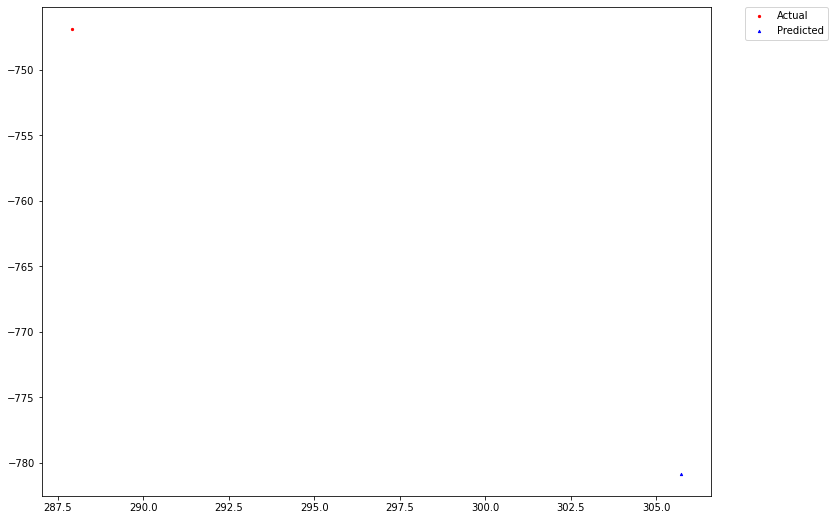

[[ 287.91376 -746.87915]]
[[ 305.7147 -780.8227]]


In [32]:
new_df = traj02.iloc[0:2,:]


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


In [33]:
traj03.iloc[0:2,:]

,X,Y,Speed,Time
0,-387.000000,1245.000000,0.000000,0
1,-420.530528,1248.556977,33.718665,1


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 23.469365


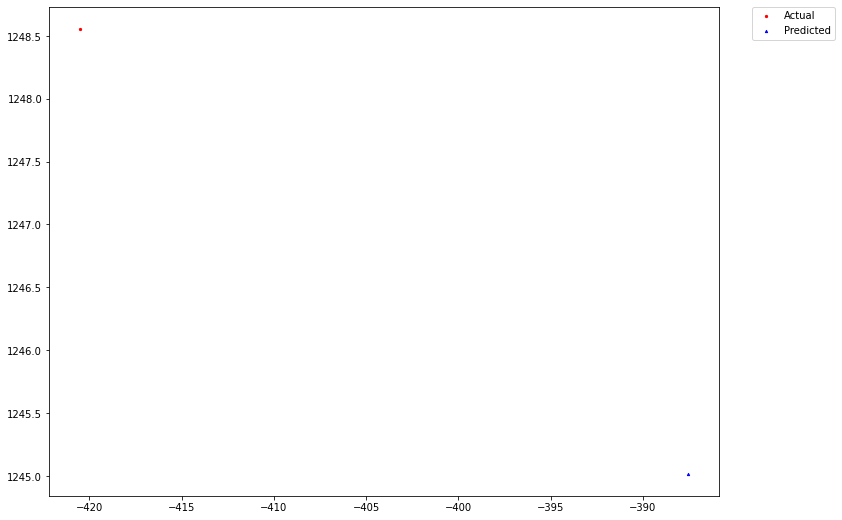

[[-420.53052 1248.557  ]]
[[-387.529  1245.0184]]


In [34]:
new_df = traj03.iloc[0:2,:]


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


In [35]:
traj04.iloc[0:2,:]


,X,Y,Speed,Time
0,-31.000000,-172.000000,0.00000,0
1,-12.040056,-137.724244,39.17023,1


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 27.461755


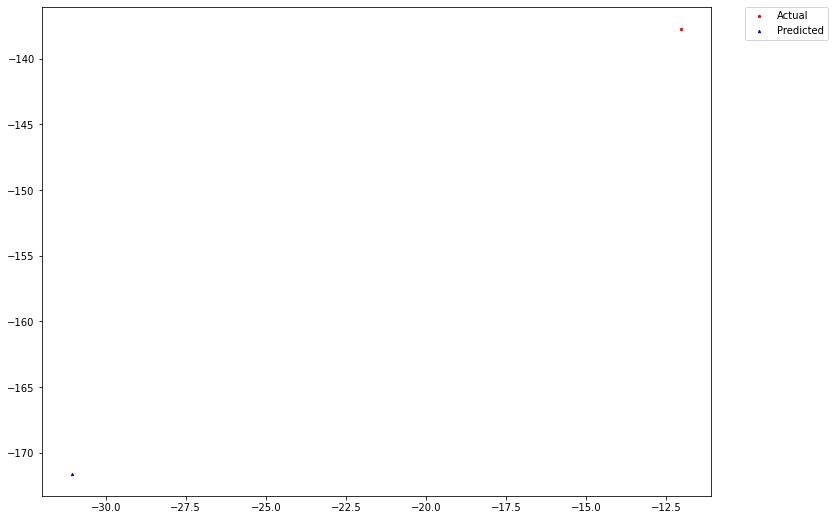

[[ -12.040055 -137.72424 ]]
[[ -31.046188 -171.59256 ]]


In [36]:
new_df = traj04.iloc[0:2,:]


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


In [37]:
traj05.iloc[0:2,:]

,X,Y,Speed,Time
0,1234.000000,798.0000,0.000000,0
1,1194.028232,791.0483,40.571768,1


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 28.749063


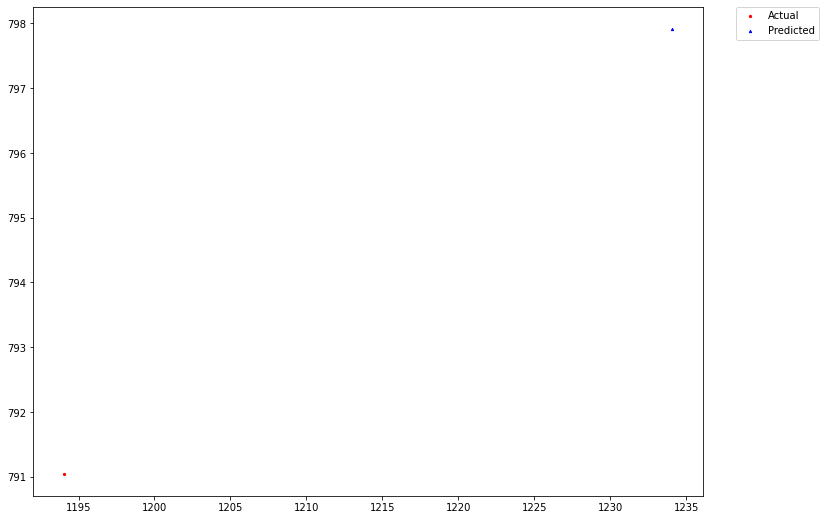

[[1194.0282  791.0483]]
[[1234.1011  797.9172]]


In [38]:
new_df = traj05.iloc[0:2,:]


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


           X          Y     Speed  Time
0  540.00000 -50.000000   0.00000     0
1  556.53253 -68.407729  24.74205     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 17.371610


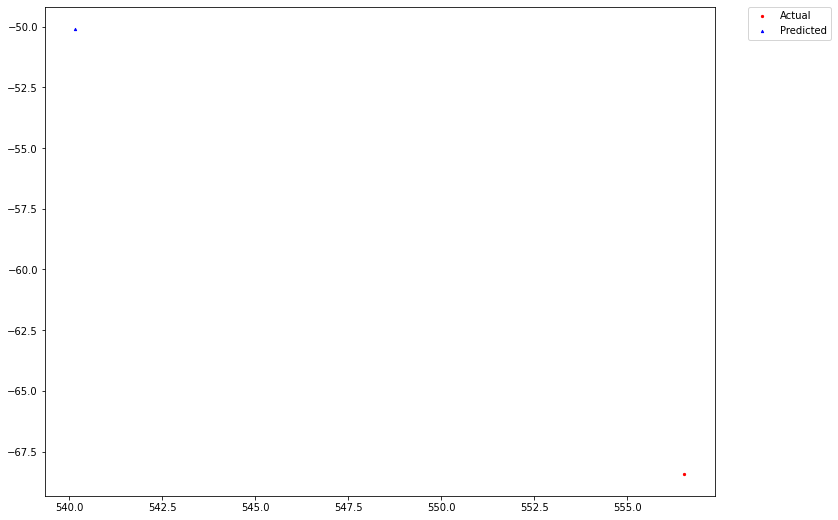

[[556.53253 -68.40773]]
[[540.16846 -50.0839 ]]


In [39]:
new_df = traj06.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


           X           Y      Speed  Time
0   6.000000  341.000000   0.000000     0
1 -16.493214  315.293273  34.158169     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 24.017574


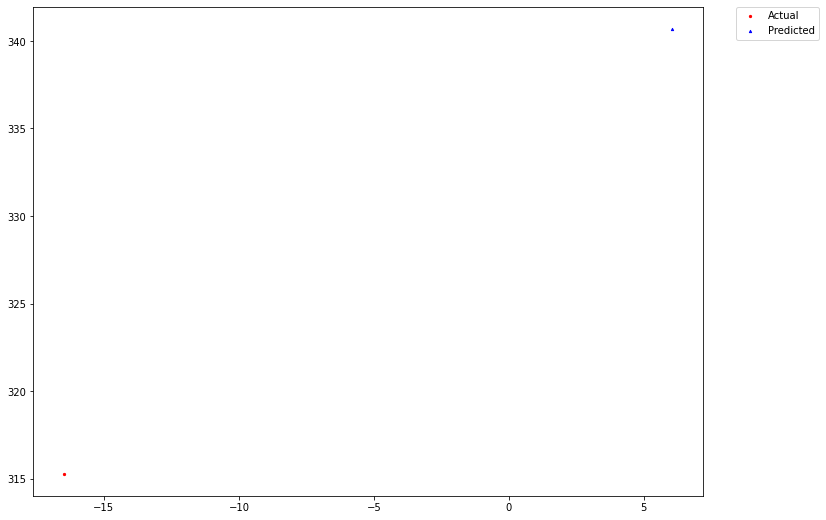

[[-16.493214 315.29327 ]]
[[  6.0568376 340.69373  ]]


In [40]:
new_df = traj07.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


             X           Y      Speed  Time
0  1196.000000 -770.000000   0.000000     0
1  1156.352547 -773.807682  39.829876     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1   0.999996        1.0     -1.0     -1.0
Test RMSE: 28.231484


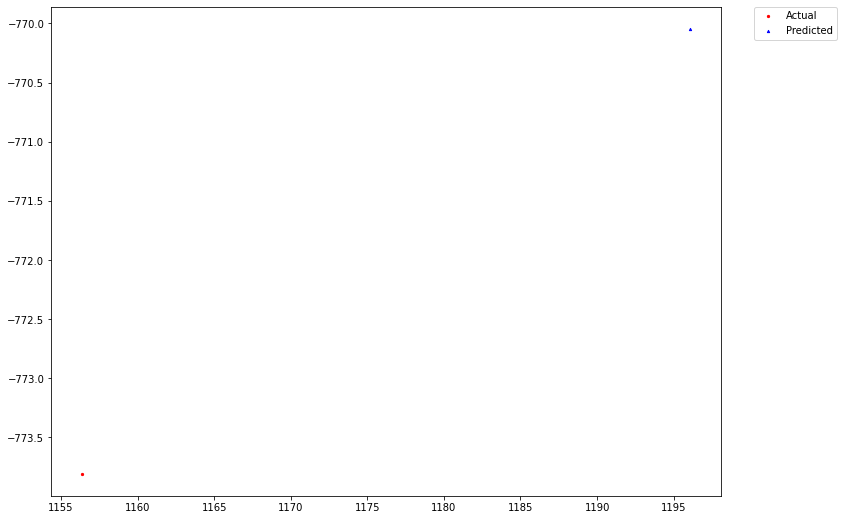

[[1156.3525 -773.8077]]
[[1196.1002  -770.04535]]


In [41]:
new_df = traj08.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print(inv_o)
print(inv_f)


In [42]:
new_df = traj09.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0  816.000000 -662.000000   0.000000     0
1  779.746776 -644.074685  40.442714     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 28.205881
[[ 779.74677 -644.0747 ]]
[[ 815.4281  -661.90686]]


In [43]:
new_df = traj10.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0  630.000000 -1011.00000   0.000000     0
1  606.878279 -1005.87866  23.682105     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 16.489927
[[  606.8783 -1005.8786]]
[[  629.63525 -1010.9733 ]]


In [44]:
new_df = traj11.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -846.000000  531.000000   0.000000     0
1 -828.927326  503.385475  32.465954     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 22.816605
[[-828.9273   503.38547]]
[[-845.82605  530.87415]]


In [45]:
new_df = traj12.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


             X            Y    Speed  Time
0  1151.000000 -1189.000000   0.0000     0
1  1128.121025 -1179.417948  24.8045     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 17.290556
[[ 1128.121 -1179.418]]
[[ 1150.639  -1188.9502]]


In [46]:
new_df = traj13.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0  441.000000 -806.000000   0.000000     0
1  412.821673 -814.140078  29.330513     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 20.769271
[[ 412.8217 -814.1401]]
[[ 441.0712  -806.09705]]


In [47]:
new_df = traj14.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X            Y      Speed  Time
0 -274.000000 -1207.000000   0.000000     0
1 -249.926411 -1177.772386  37.865434     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 26.612334
[[ -249.9264 -1177.7723]]
[[ -274.05862 -1206.6526 ]]


In [48]:
new_df = traj15.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


           X           Y      Speed  Time
0  277.00000 -650.000000   0.000000     0
1  267.10872 -623.309239  28.464612     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 19.997334
[[ 267.10873 -623.30927]]
[[ 276.84396 -649.8613 ]]


In [49]:
new_df = traj16.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X          Y   Speed  Time
0  634.000000  41.000000   0.000     0
1  634.272022  13.744357  27.257     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 19.185754
[[634.27203   13.744358]]
[[634.00275   40.875774]]


In [50]:
new_df = traj17.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


             X           Y      Speed  Time
0  1087.000000 -748.000000   0.000000     0
1  1077.950664 -723.153995  26.442663     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 18.577563
[[1077.9507 -723.154 ]]
[[1086.8572 -747.8709]]


In [51]:
new_df = traj18.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -638.000000  401.000000   0.000000     0
1 -646.662078  372.165656  30.107324     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 21.061095
[[-646.66205  372.16565]]
[[-637.9781  400.6565]]


In [52]:
new_df = traj19.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -195.000000  735.000000   0.000000     0
1 -176.310513  702.645809  37.364296     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 26.262979
[[-176.31052  702.6458 ]]
[[-194.80957  734.85254]]


In [53]:
new_df = traj20.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X            Y      Speed  Time
0 -914.000000 -1039.000000   0.000000     0
1 -897.734186 -1026.132263  20.740187     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 14.620773
[[ -897.7342 -1026.1322]]
[[ -914.0396 -1038.847 ]]


In [54]:
new_df = traj21.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -973.000000  375.000000   0.000000     0
1 -979.904853  342.551502  33.175021     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 23.193586
[[-979.9048  342.5515]]
[[-972.9825   374.61343]]


In [55]:
new_df = traj22.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -615.000000 -240.000000   0.000000     0
1 -599.093561 -215.816513  28.945739     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 20.313409
[[-599.09357 -215.81651]]
[[-615.03876 -239.71254]]


In [56]:
new_df = traj23.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


           X          Y     Speed  Time
0  888.00000 -807.00000   0.00000     0
1  858.45016 -787.46126  35.42535     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 24.735247
[[ 858.45013 -787.46124]]
[[ 887.5338  -806.89844]]


In [57]:
new_df = traj24.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -994.000000  209.000000   0.000000     0
1 -962.713087  217.786119  32.497182     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 23.011078
[[-962.7131   217.78612]]
[[-994.07623  209.10443]]


In [58]:
new_df = traj25.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X            Y      Speed  Time
0 -957.000000  1184.000000   0.000000     0
1 -925.614561  1154.221612  43.264283     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 30.362493
[[-925.61456 1154.2216 ]]
[[-956.6802 1183.8643]]


In [59]:
new_df = traj26.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


             X            Y      Speed  Time
0  1030.000000 -1135.000000   0.000000     0
1   996.505573 -1140.431334  33.931933     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 24.045292
[[  996.50555 -1140.4313 ]]
[[ 1030.0846 -1135.0647]]


In [60]:
new_df = traj27.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -414.000000  869.000000   0.000000     0
1 -421.298144  838.924684  30.948143     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 21.640602
[[-421.29816  838.9247 ]]
[[-413.98157  868.64166]]


In [61]:
new_df = traj28.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X          Y      Speed  Time
0 -534.000000   0.000000   0.000000     0
1 -538.365838 -36.651612  36.910719     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 25.794195
[[-538.36584  -36.65161]]
[[-5.3398895e+02 -4.3664381e-01]]


In [62]:
new_df = traj29.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0  738.000000 -798.000000   0.000000     0
1  718.520867 -768.088772  35.694792     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 25.029678
[[ 718.5209  -768.08875]]
[[ 737.6927 -797.8446]]


In [63]:
new_df = traj30.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -485.000000  252.000000   0.000000     0
1 -498.688905  273.945041  25.864473     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 18.139912
[[-498.6889   273.94504]]
[[-485.21597  252.11403]]


In [64]:
new_df = traj31.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -970.000000 -238.000000   0.000000     0
1 -962.349823 -208.071547  30.890734     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 21.602710
[[-962.34985 -208.07155]]
[[-970.0186  -237.64424]]


In [65]:
new_df = traj32.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X            Y      Speed  Time
0 -369.000000 -1036.000000   0.000000     0
1 -354.247356 -1016.942067  24.100733     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 16.931101
[[ -354.24734 -1016.942  ]]
[[ -369.03592 -1035.7734 ]]


In [66]:
new_df = traj33.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y     Speed  Time
0 -541.000000  366.000000   0.00000     0
1 -559.209467  348.850874  25.01354     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0   1.000004     -1.0     -1.0
Test RMSE: 17.612385
[[-559.2095   348.85083]]
[[-540.954    365.79572]]


In [67]:
new_df = traj34.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


           X           Y      Speed  Time
0  35.000000 -538.000000   0.000000     0
1   8.825372 -553.988773  30.671681     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 21.658298
[[   8.825372 -553.9888  ]]
[[  35.066143 -538.1905  ]]


In [68]:
new_df = traj35.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y    Speed  Time
0  728.000000 -410.000000   0.0000     0
1  744.025883 -435.238182  29.8964     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 21.009455
[[ 744.0259 -435.2382]]
[[ 728.16327 -410.11505]]


In [69]:
new_df = traj36.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -1056.00000 -980.000000   0.000000     0
1 -1043.18239 -961.687082  22.352943     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 15.692789
[[-1043.1824  -961.6871]]
[[-1056.0311  -979.7823]]


In [70]:
new_df = traj37.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


             X           Y      Speed  Time
0 -1145.000000  850.000000   0.000000     0
1 -1114.816097  825.126549  39.112102     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 27.437748
[[-1114.816    825.1265]]
[[-1144.6924    849.88666]]


In [71]:
new_df = traj38.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X         Y      Speed  Time
0 -727.000000 -72.00000   0.000000     0
1 -703.910815 -92.54139  30.904032     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 21.684221
[[-703.9108   -92.54139]]
[[-726.7647   -72.09363]]


In [72]:
new_df = traj39.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0  870.000000  970.000000   0.000000     0
1  890.550037  950.435534  28.373797     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 19.912662
[[890.55005 950.43555]]
[[870.20935 969.91077]]


In [73]:
new_df = traj40.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X            Y      Speed  Time
0 -907.000000 -1152.000000   0.000000     0
1 -917.786773 -1130.462892  24.087372     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0       -1.0     -1.0      1.0
Test RMSE: 16.907833
[[ -917.78674 -1130.4629 ]]
[[ -907.17017 -1151.8881 ]]


In [74]:
new_df = traj41.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


           X           Y     Speed  Time
0  972.00000  248.000000   0.00000     0
1  985.29644  276.165534  31.14631     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 21.819782
[[985.29645 276.16553]]
[[971.96765 248.33481]]


In [75]:
new_df = traj42.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -898.000000 -955.000000   0.000000     0
1 -863.708839 -954.617054  34.293299     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 24.308010
[[-863.70886 -954.61707]]
[[-898.0835 -954.9954]]


In [76]:
new_df = traj43.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


             X           Y      Speed  Time
0  1037.000000 -277.000000   0.000000     0
1   998.458085 -290.773681  40.929128     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 28.967394
[[ 998.45807 -290.77368]]
[[1037.0974 -277.1641]]


In [77]:
new_df = traj44.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X            Y      Speed  Time
0 -885.000000  1022.000000   0.000000     0
1 -888.524611   995.032453  27.196902     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 19.006680
[[-888.5246   995.03253]]
[[-884.9911 1021.6788]]


In [78]:
new_df = traj45.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y      Speed  Time
0 -176.000000  767.000000   0.000000     0
1 -174.727907  747.570207  19.471392     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 13.705277
[[-174.7279  747.5702]]
[[-175.98703  766.91144]]


In [79]:
new_df = traj46.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X            Y      Speed  Time
0 -599.000000  1144.000000   0.000000     0
1 -586.351674  1125.707013  22.239908     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 15.625724
[[-586.3517 1125.707 ]]
[[-598.87115 1143.9166 ]]


In [80]:
new_df = traj47.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X         Y     Speed  Time
0 -860.000000  424.0000   0.00000     0
1 -822.546591  413.7588  38.82834     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 27.186853
[[-822.5466   413.75876]]
[[-859.6184  423.9533]]


In [81]:
new_df = traj48.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


            X           Y   Speed  Time
0 -463.000000 -723.000000   0.000     0
1 -441.150301 -691.475828  38.356     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0       -1.0      1.0      1.0
Test RMSE: 26.926082
[[-441.1503 -691.4758]]
[[-463.05322 -722.6253 ]]


In [82]:
new_df = traj49.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


print(inv_o)
print(inv_f)


             X         Y      Speed  Time
0  1210.000000  947.0000   0.000000     0
1  1193.554237  918.9691  32.499146     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        1.0        1.0     -1.0     -1.0
Test RMSE: 22.791988
[[1193.5542  918.9691]]
[[1210.0415  946.666 ]]


            X            Y      Speed  Time
0  631.000000  1101.000000   0.000000     0
1  644.690095  1076.756397  27.841893     1
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1       -1.0        1.0      1.0     -1.0
Test RMSE: 19.570778


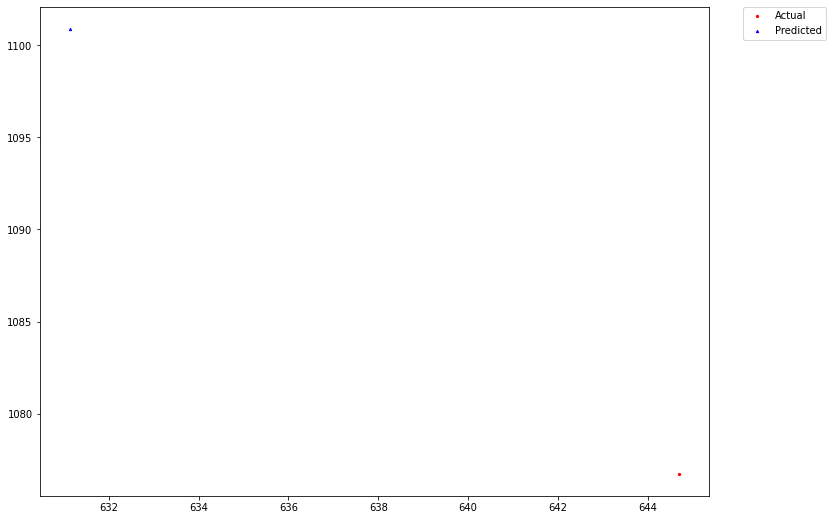

[[ 644.6901 1076.7563]]
[[ 631.13947 1100.8895 ]]


In [83]:
new_df = traj50.iloc[0:2,:]

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

print(inv_o)
print(inv_f)


In [84]:
inv_o1 = inv_o
inv_f1 = inv_f

              X            Y      Speed  Time
0    631.000000  1101.000000   0.000000     0
1    644.690095  1076.756397  27.841893     1
2    658.369594  1052.515323  27.834481     2
3    672.027903  1028.279311  27.819664     3
4    685.654426  1004.050889  27.797456     4
..          ...          ...        ...   ...
558  -91.380666  -372.738735  25.783842   558
559  -87.406844  -347.184007  25.861852   559
560  -83.334205  -321.582248  25.923666   560
561  -79.189366  -295.946125  25.969029   561
562  -74.998944  -270.288308  25.997754   562

[563 rows x 4 columns]
   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.299173   0.886431  0.319849  0.867836
2   0.319849   0.867836  0.340509  0.849243
3   0.340509   0.849243  0.361137  0.830653
4   0.361137   0.830653  0.381716  0.812070
5   0.381716   0.812070  0.402233  0.793494
Test RMSE: 17.619568


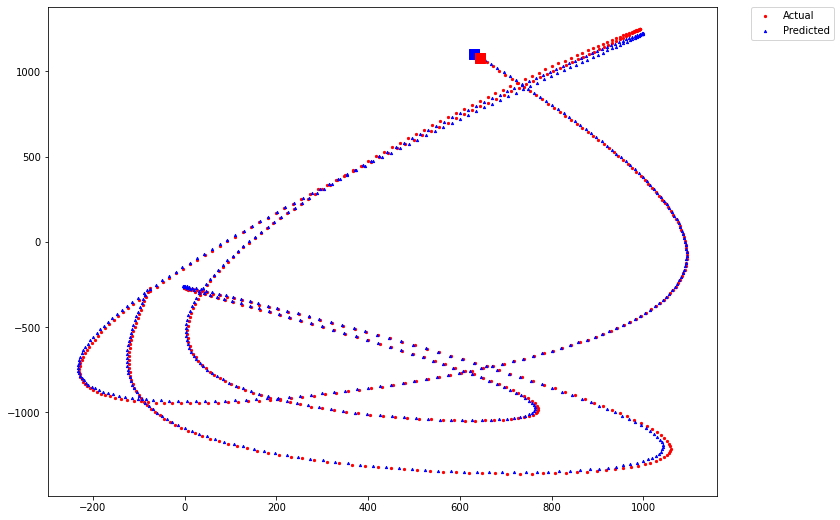

[[ 644.6901  1076.7563 ]
 [ 658.36957 1052.5154 ]
 [ 672.02795 1028.2793 ]
 ...
 [ -83.33423 -321.58224]
 [ -79.18937 -295.94614]
 [ -74.99896 -270.2883 ]]
[[ 641.331    1089.4862  ]
 [ 654.9147   1065.6072  ]
 [ 668.48553  1041.7064  ]
 ...
 [ -89.64384  -334.17657 ]
 [ -85.43567  -308.782   ]
 [ -81.150505 -283.349   ]]


In [85]:
new_df = traj50

print(new_df)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())




reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o


fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")
plt.scatter(pd.DataFrame(inv_f1)[0],pd.DataFrame(inv_f1)[1],marker='s',c='b',s=100,alpha=1)
plt.scatter(pd.DataFrame(inv_o1)[0],pd.DataFrame(inv_o1)[1],marker='s',c='r',s=100,alpha=1)


# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

print(inv_o)
print(inv_f)


# Second case: test with 10 predicted points

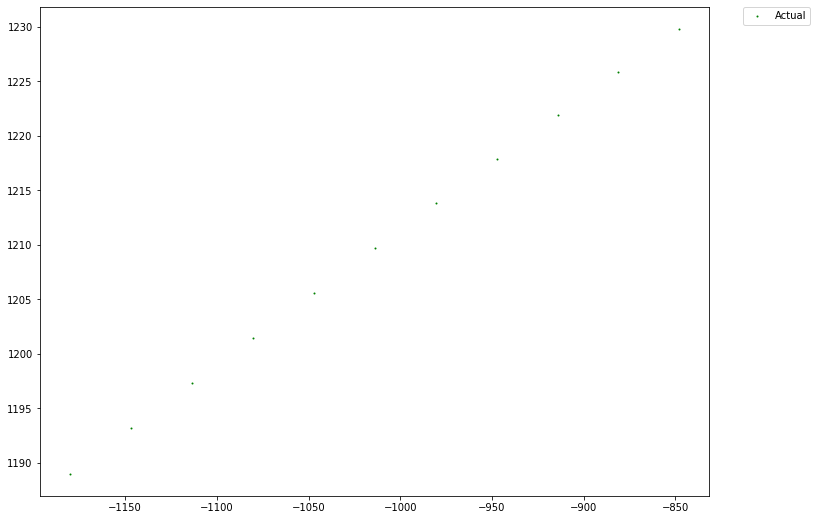

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -1.000000 -0.799366 -0.796139
2  -0.799366  -0.796139 -0.598771 -0.592503
3  -0.598771  -0.592503 -0.398251 -0.389339
4  -0.398251  -0.389339 -0.197848 -0.186886
5  -0.197848  -0.186886  0.002402  0.014641


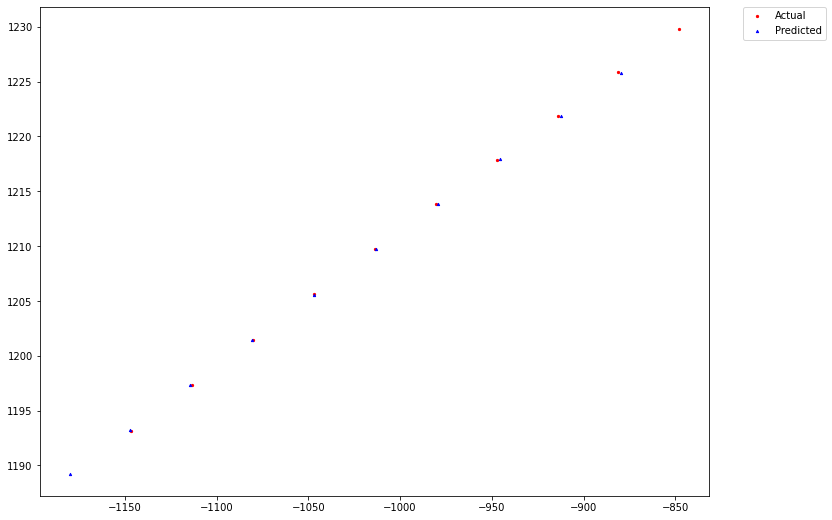

Test RMSE at prediction point 1 : 23.557150
Test RMSE at prediction point 2 : 24.151166
Test RMSE at prediction point 3 : 24.332822
Test RMSE at prediction point 4 : 24.195629
Test RMSE at prediction point 5 : 23.841575
Test RMSE at prediction point 6 : 23.376684
Test RMSE at prediction point 7 : 22.908869
Test RMSE at prediction point 8 : 22.543775
Test RMSE at prediction point 9 : 22.382334
Test RMSE at prediction point 10 : 22.517304
Average of RMSE : 25.978590


In [361]:
traj000 =traj00.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

In [380]:
traj00.iloc[0:11,:]

,X,Y,Speed,Time
0,-1180.000000,1189.000000,0.000000,0
1,-1146.705463,1193.160693,33.553503,1
2,-1113.417303,1197.316605,33.546583,2
3,-1080.141897,1201.462958,33.532743,3
4,-1046.885622,1205.594970,33.511988,4
5,-1013.654855,1209.707862,33.484321,5
6,-980.455972,1213.796854,33.449748,6
7,-947.295351,1217.857165,33.408276,7
8,-914.179369,1221.884015,33.359913,8
9,-881.114402,1225.872625,33.304670,9


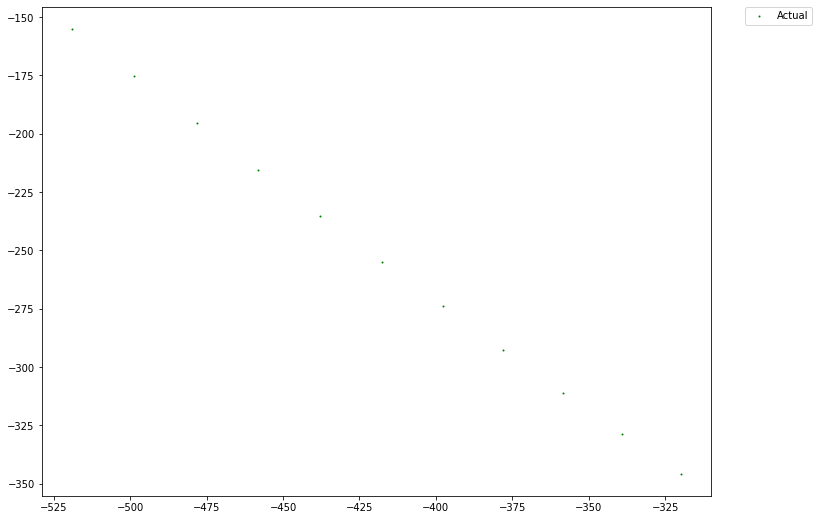

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000   1.000000 -0.795549  0.787482
2  -0.795549   0.787482 -0.591367  0.575722
3  -0.591367   0.575722 -0.387725  0.365480
4  -0.387725   0.365480 -0.184893  0.157514
5  -0.184893   0.157514  0.016860 -0.047417


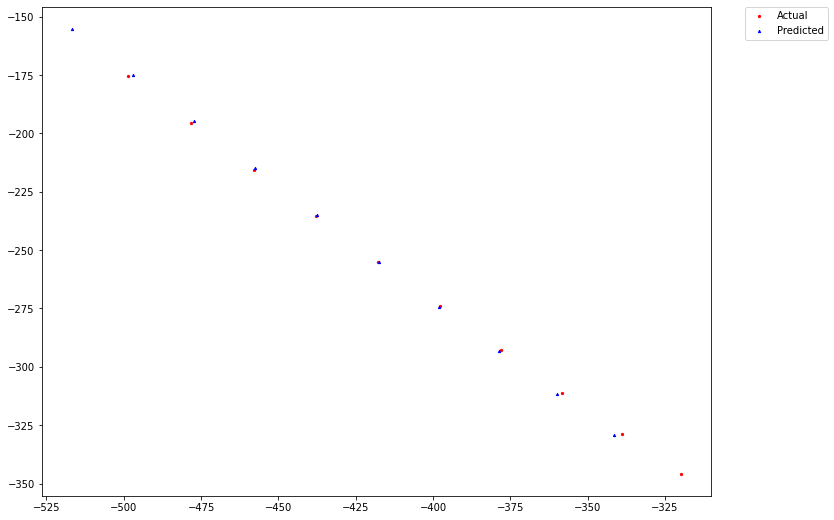

Test RMSE at prediction point 1 : 19.099784
Test RMSE at prediction point 2 : 19.761081
Test RMSE at prediction point 3 : 20.030068
Test RMSE at prediction point 4 : 20.003341
Test RMSE at prediction point 5 : 19.785270
Test RMSE at prediction point 6 : 19.482793
Test RMSE at prediction point 7 : 19.199442
Test RMSE at prediction point 8 : 19.030044
Test RMSE at prediction point 9 : 19.055399
Test RMSE at prediction point 10 : 19.338382
Average of RMSE : 21.642845


In [362]:
traj000 =traj01.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()




# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

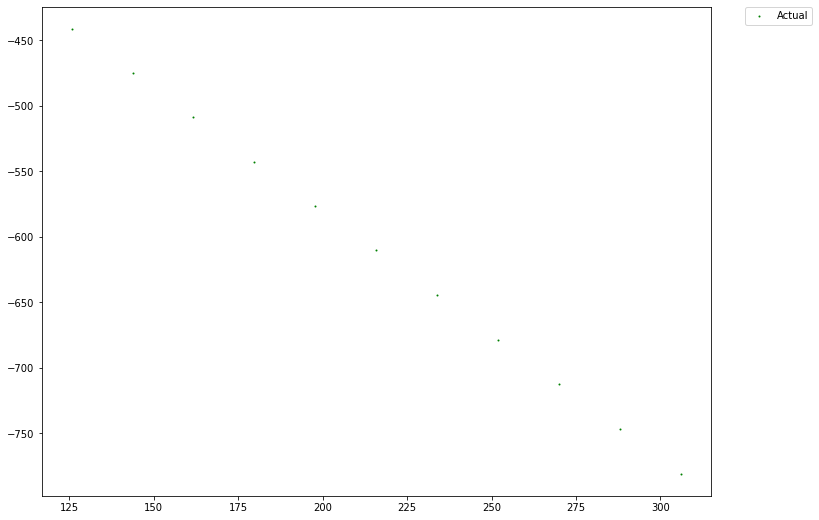

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.799282 -0.799167
2   0.799282  -0.799167  0.598608 -0.598384
3   0.598608  -0.598384  0.398021 -0.397702
4   0.398021  -0.397702  0.197564 -0.197172
5   0.197564  -0.197172 -0.002718  0.003156


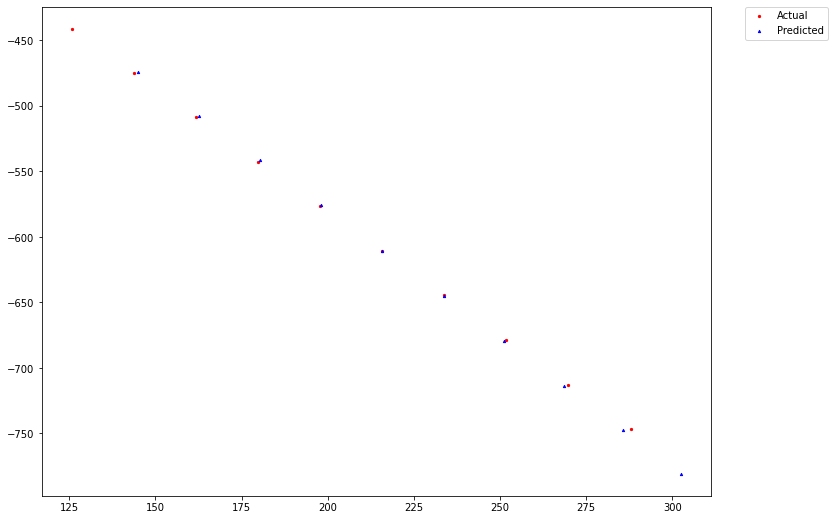

Test RMSE at prediction point 1 : 25.956858
Test RMSE at prediction point 2 : 27.011958
Test RMSE at prediction point 3 : 27.554481
Test RMSE at prediction point 4 : 27.691082
Test RMSE at prediction point 5 : 27.541163
Test RMSE at prediction point 6 : 27.232853
Test RMSE at prediction point 7 : 26.898258
Test RMSE at prediction point 8 : 26.669772
Test RMSE at prediction point 9 : 26.675644
Test RMSE at prediction point 10 : 27.035980
Average of RMSE : 30.029783


In [363]:
traj000 =traj02.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#
# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

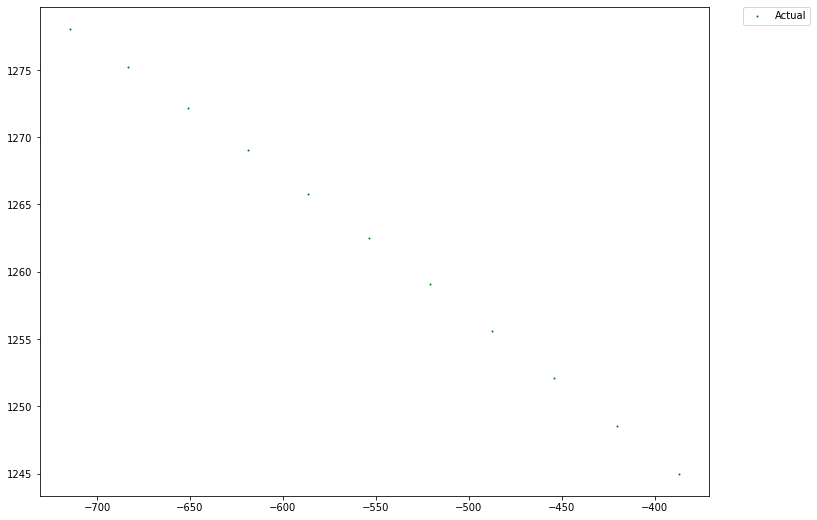

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.795223 -0.784790
2   0.795223  -0.784790  0.590736 -0.570496
3   0.590736  -0.570496  0.386827 -0.358047
4   0.386827  -0.358047  0.183787 -0.148361
5   0.183787  -0.148361 -0.018095  0.057632


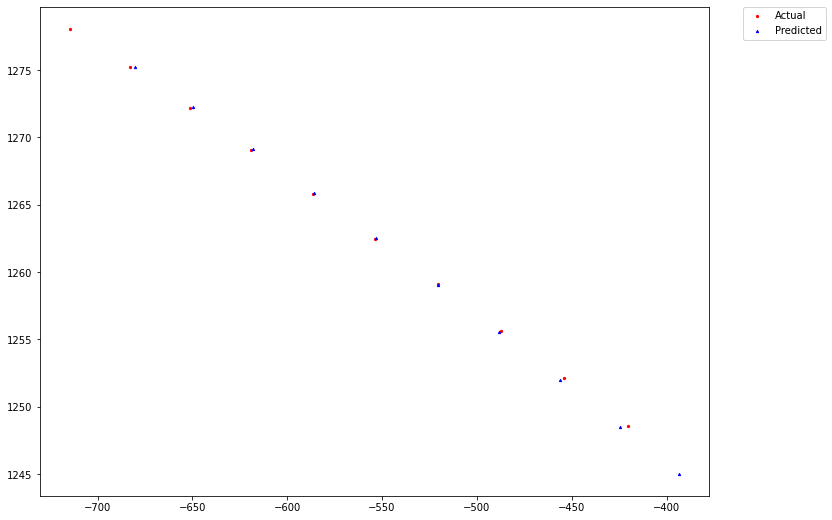

Test RMSE at prediction point 1 : 19.285419
Test RMSE at prediction point 2 : 21.119585
Test RMSE at prediction point 3 : 22.365438
Test RMSE at prediction point 4 : 23.126002
Test RMSE at prediction point 5 : 23.517522
Test RMSE at prediction point 6 : 23.662578
Test RMSE at prediction point 7 : 23.683307
Test RMSE at prediction point 8 : 23.694991
Test RMSE at prediction point 9 : 23.800103
Test RMSE at prediction point 10 : 24.084004
Average of RMSE : 25.370994


In [364]:
traj000 =traj03.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

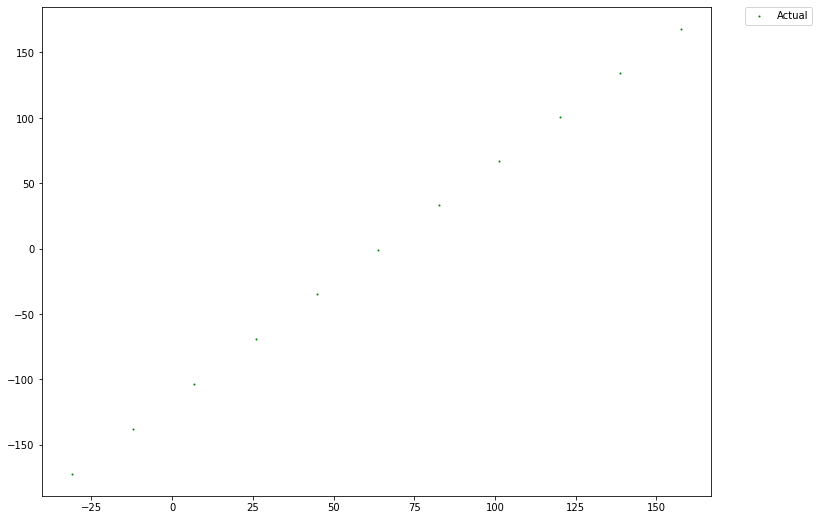

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -1.000000 -0.798873 -0.798444
2  -0.798873  -0.798444 -0.597814 -0.596982
3  -0.597814  -0.596982 -0.396892 -0.395709
4  -0.396892  -0.395709 -0.196175 -0.194719
5  -0.196175  -0.194719  0.004269  0.005894


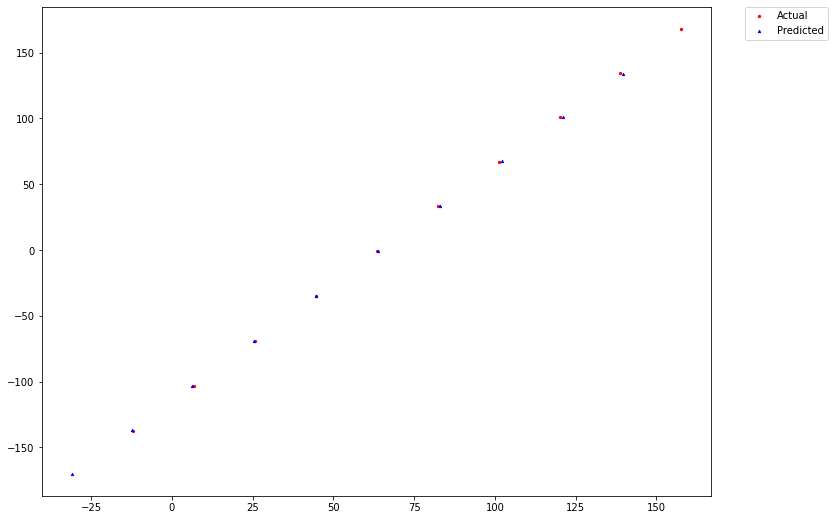

Test RMSE at prediction point 1 : 26.351450
Test RMSE at prediction point 2 : 27.332254
Test RMSE at prediction point 3 : 27.811304
Test RMSE at prediction point 4 : 27.901018
Test RMSE at prediction point 5 : 27.723094
Test RMSE at prediction point 6 : 27.405118
Test RMSE at prediction point 7 : 27.076824
Test RMSE at prediction point 8 : 26.866160
Test RMSE at prediction point 9 : 26.895595
Test RMSE at prediction point 10 : 27.278554
Average of RMSE : 30.293486


In [365]:
traj000 =traj04.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

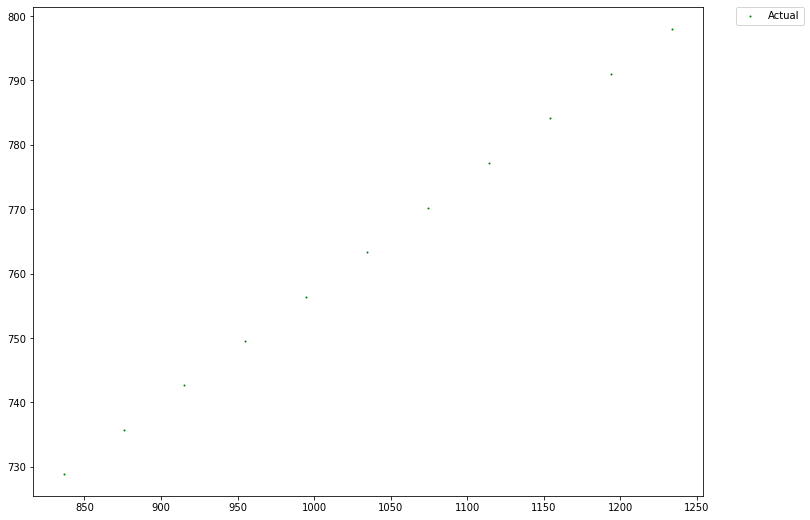

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000   1.000000  0.798930  0.798634
2   0.798930   0.798634  0.597925  0.597353
3   0.597925   0.597353  0.397049  0.396236
4   0.397049   0.396236  0.196369  0.195368
5   0.196369   0.195368 -0.004053 -0.005171


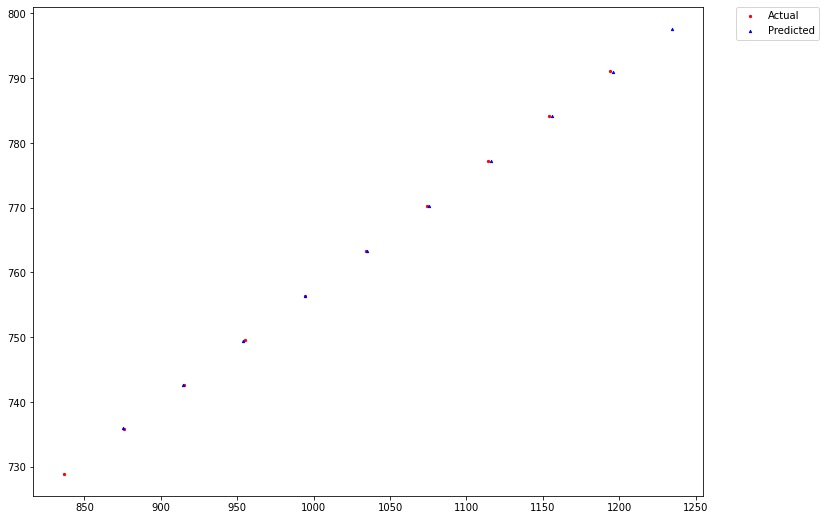

Test RMSE at prediction point 1 : 29.173413
Test RMSE at prediction point 2 : 29.853874
Test RMSE at prediction point 3 : 30.043151
Test RMSE at prediction point 4 : 29.853696
Test RMSE at prediction point 5 : 29.407144
Test RMSE at prediction point 6 : 28.830687
Test RMSE at prediction point 7 : 28.253702
Test RMSE at prediction point 8 : 27.804413
Test RMSE at prediction point 9 : 27.605187
Test RMSE at prediction point 10 : 27.770716
Average of RMSE : 32.066220


In [366]:
traj000 =traj05.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# 
# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

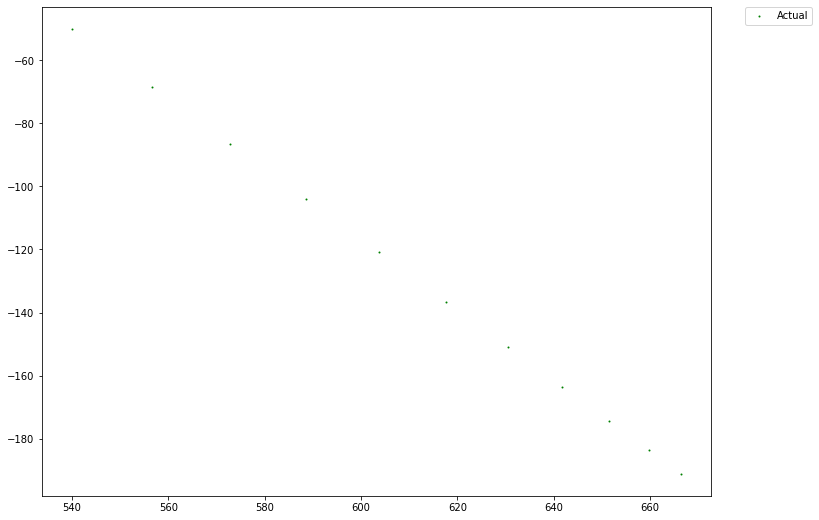

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000   1.000000 -0.738367  0.739070
2  -0.738367   0.739070 -0.480671  0.482031
3  -0.480671   0.482031 -0.230846  0.232772
4  -0.230846   0.232772  0.007168 -0.004817
5   0.007168  -0.004817  0.229436 -0.226845


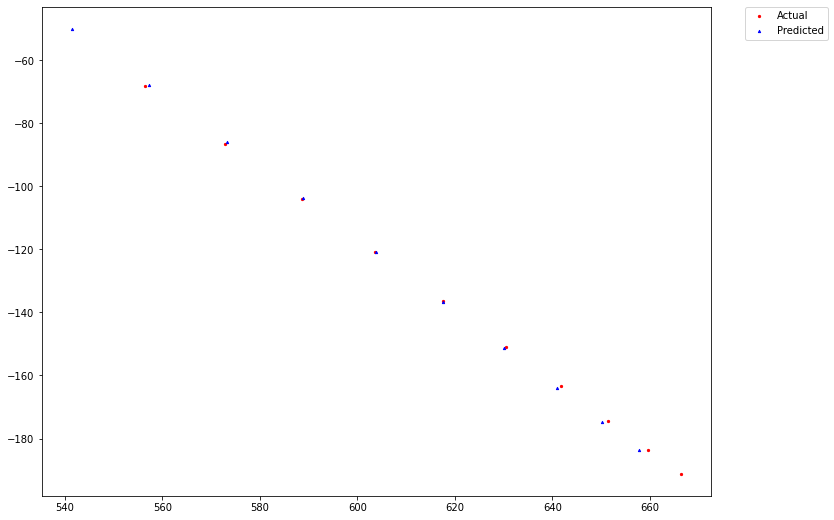

Test RMSE at prediction point 1 : 16.749968
Test RMSE at prediction point 2 : 17.049763
Test RMSE at prediction point 3 : 16.735507
Test RMSE at prediction point 4 : 15.946694
Test RMSE at prediction point 5 : 14.822552
Test RMSE at prediction point 6 : 13.477387
Test RMSE at prediction point 7 : 11.990904
Test RMSE at prediction point 8 : 10.534923
Test RMSE at prediction point 9 : 9.228628
Test RMSE at prediction point 10 : 8.037340
Average of RMSE : 14.952630


In [367]:
traj000 =traj06.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# 
# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

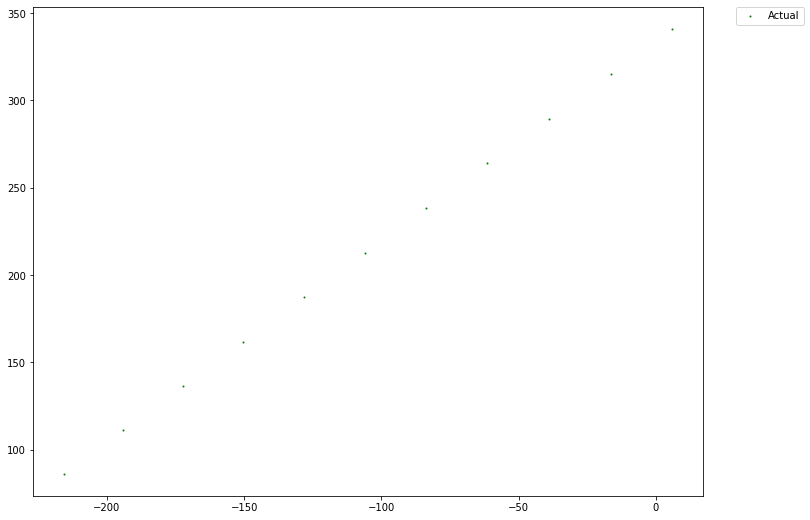

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000   1.000000  0.797155  0.798051
2   0.797155   0.798051  0.594482  0.596219
3   0.594482   0.596219  0.392153  0.394624
4   0.392153   0.394624  0.190343  0.193384
5   0.190343   0.193384 -0.010778 -0.007384


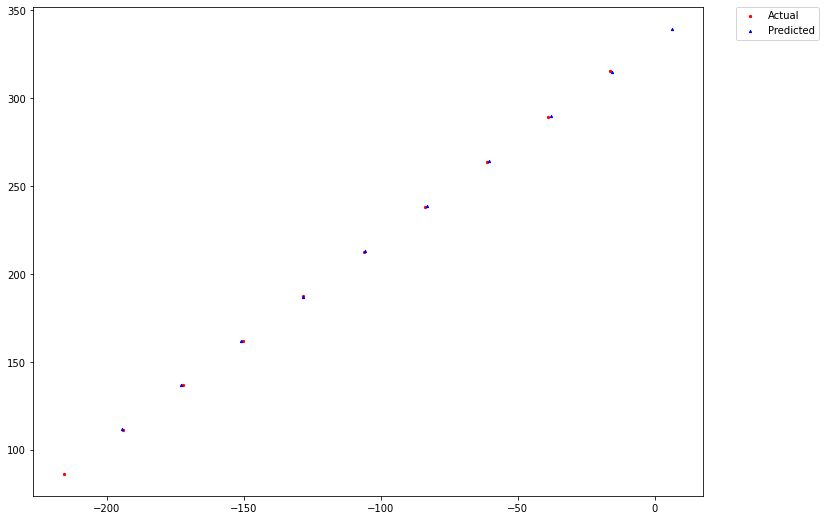

Test RMSE at prediction point 1 : 23.596927
Test RMSE at prediction point 2 : 24.346967
Test RMSE at prediction point 3 : 24.662783
Test RMSE at prediction point 4 : 24.642138
Test RMSE at prediction point 5 : 24.391060
Test RMSE at prediction point 6 : 24.020484
Test RMSE at prediction point 7 : 23.642684
Test RMSE at prediction point 8 : 23.367523
Test RMSE at prediction point 9 : 23.298886
Test RMSE at prediction point 10 : 23.531624
Average of RMSE : 26.611231


In [368]:
traj000 =traj07.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# 
# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

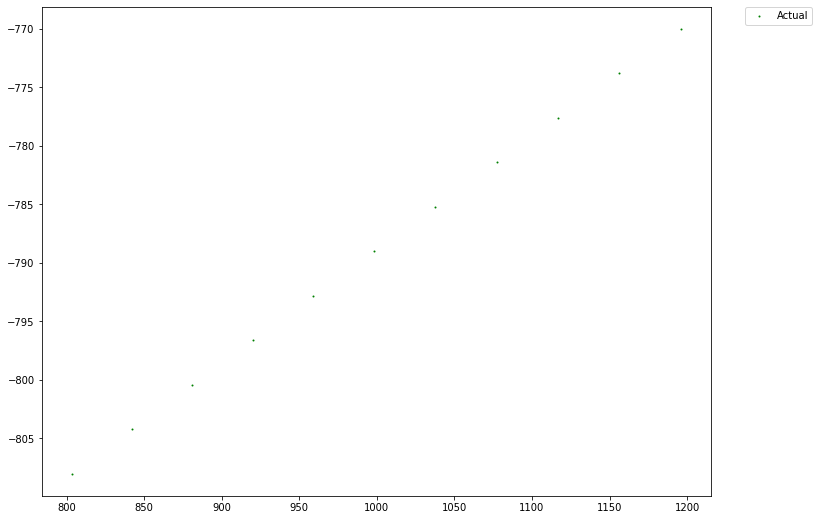

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000   1.000000  0.797983  0.799744
2   0.797983   0.799744  0.596089  0.599503
3   0.596089   0.599503  0.394439  0.399292
4   0.394439   0.399292  0.193155  0.199131
5   0.193155   0.199131 -0.007639 -0.000973


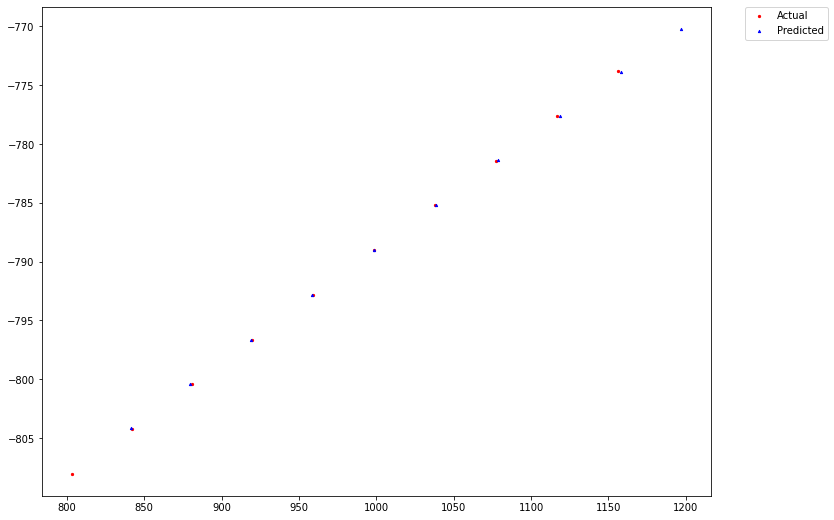

Test RMSE at prediction point 1 : 28.678826
Test RMSE at prediction point 2 : 29.330052
Test RMSE at prediction point 3 : 29.493482
Test RMSE at prediction point 4 : 29.279168
Test RMSE at prediction point 5 : 28.805778
Test RMSE at prediction point 6 : 28.198056
Test RMSE at prediction point 7 : 27.582046
Test RMSE at prediction point 8 : 27.082156
Test RMSE at prediction point 9 : 26.817850
Test RMSE at prediction point 10 : 26.899225
Average of RMSE : 31.351849


In [369]:
traj000 =traj08.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

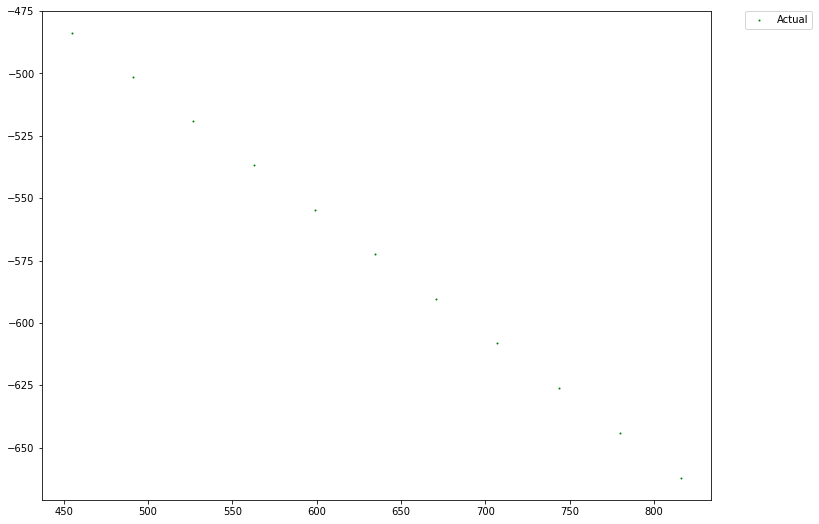

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.799104 -0.798922
2   0.799104  -0.798922  0.598263 -0.597910
3   0.598263  -0.597910  0.397530 -0.397028
4   0.397530  -0.397028  0.196960 -0.196342
5   0.196960  -0.196342 -0.003392  0.004083


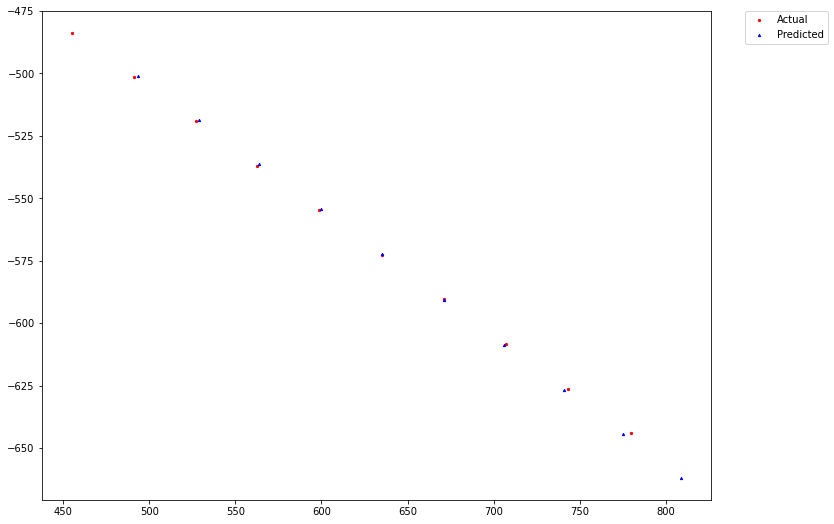

Test RMSE at prediction point 1 : 24.092924
Test RMSE at prediction point 2 : 25.983392
Test RMSE at prediction point 3 : 27.277260
Test RMSE at prediction point 4 : 28.081066
Test RMSE at prediction point 5 : 28.516662
Test RMSE at prediction point 6 : 28.715209
Test RMSE at prediction point 7 : 28.813471
Test RMSE at prediction point 8 : 28.948827
Test RMSE at prediction point 9 : 29.254859
Test RMSE at prediction point 10 : 29.857279
Average of RMSE : 31.060106


In [370]:
traj000 =traj09.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

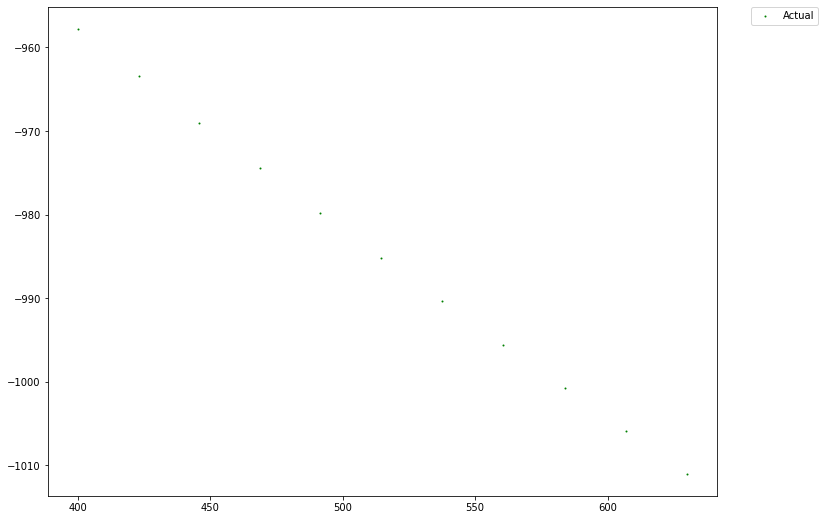

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.798855 -0.807594
2   0.798855  -0.807594  0.597780 -0.614727
3   0.597780  -0.614727  0.396843 -0.420940
4   0.396843  -0.420940  0.196115 -0.225773
5   0.196115  -0.225773 -0.004336 -0.028767


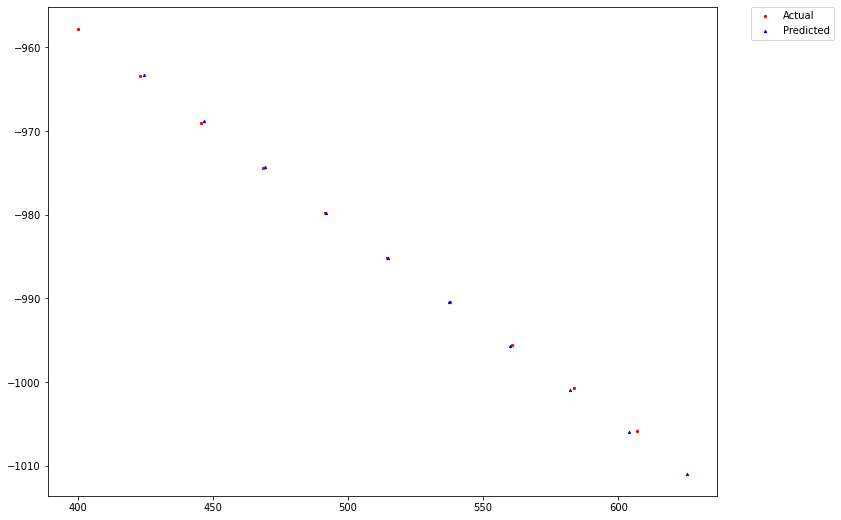

Test RMSE at prediction point 1 : 13.608861
Test RMSE at prediction point 2 : 14.826339
Test RMSE at prediction point 3 : 15.691563
Test RMSE at prediction point 4 : 16.266262
Test RMSE at prediction point 5 : 16.618842
Test RMSE at prediction point 6 : 16.823116
Test RMSE at prediction point 7 : 16.956617
Test RMSE at prediction point 8 : 17.099514
Test RMSE at prediction point 9 : 17.332462
Test RMSE at prediction point 10 : 17.735035
Average of RMSE : 18.106512


In [371]:
traj000 =traj10.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

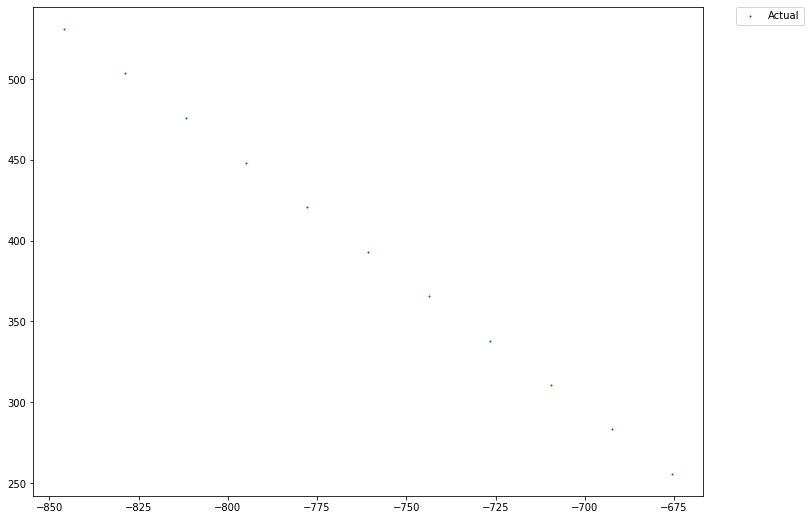

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000   1.000000 -0.799776  0.799270
2  -0.799776   0.799270 -0.599566  0.598585
3  -0.599566   0.598585 -0.399383  0.397988
4  -0.399383   0.397988 -0.199240  0.197524
5  -0.199240   0.197524  0.000849 -0.002764


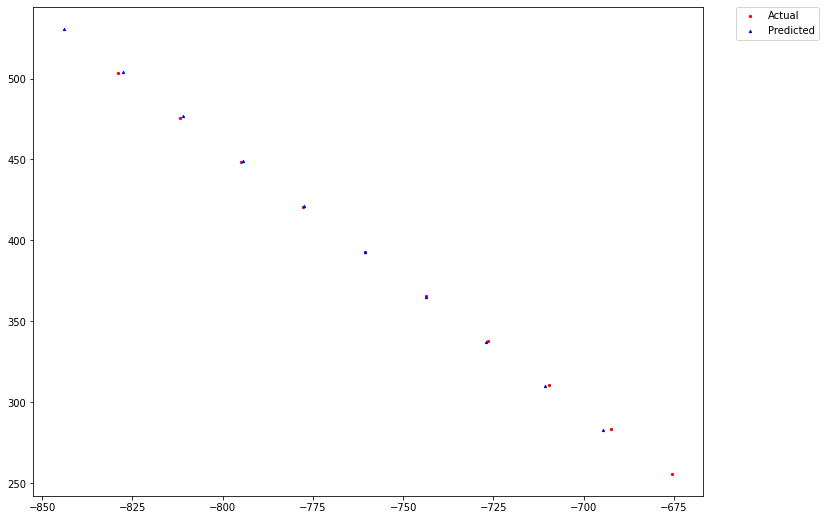

Test RMSE at prediction point 1 : 22.092653
Test RMSE at prediction point 2 : 22.847271
Test RMSE at prediction point 3 : 23.198625
Test RMSE at prediction point 4 : 23.244578
Test RMSE at prediction point 5 : 23.091805
Test RMSE at prediction point 6 : 22.852567
Test RMSE at prediction point 7 : 22.641887
Test RMSE at prediction point 8 : 22.573241
Test RMSE at prediction point 9 : 22.755883
Test RMSE at prediction point 10 : 23.290586
Average of RMSE : 25.398788


In [372]:
traj000 =traj11.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

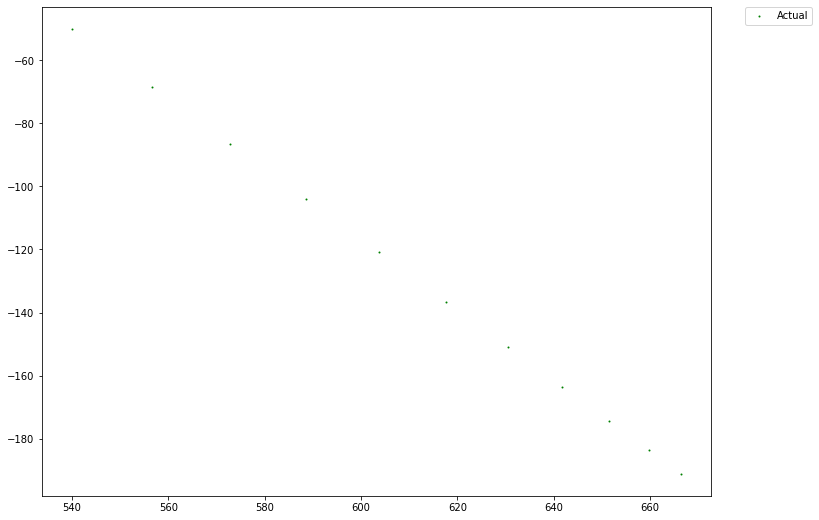

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000   1.000000 -0.738367  0.739070
2  -0.738367   0.739070 -0.480671  0.482031
3  -0.480671   0.482031 -0.230846  0.232772
4  -0.230846   0.232772  0.007168 -0.004817
5   0.007168  -0.004817  0.229436 -0.226845


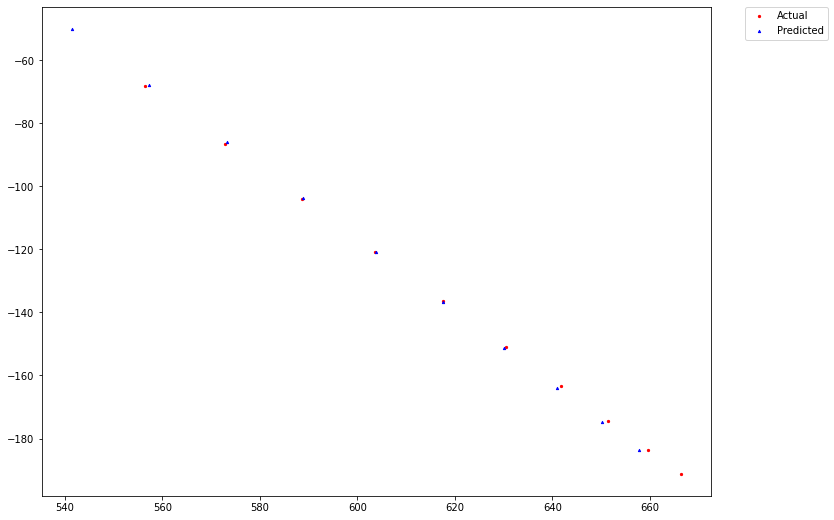

Test RMSE at prediction point 1 : 16.749968
Test RMSE at prediction point 2 : 17.049763
Test RMSE at prediction point 3 : 16.735507
Test RMSE at prediction point 4 : 15.946694
Test RMSE at prediction point 5 : 14.822552
Test RMSE at prediction point 6 : 13.477387
Test RMSE at prediction point 7 : 11.990904
Test RMSE at prediction point 8 : 10.534923
Test RMSE at prediction point 9 : 9.228628
Test RMSE at prediction point 10 : 8.037340
Average of RMSE : 14.952630


In [373]:
traj000 =traj06.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

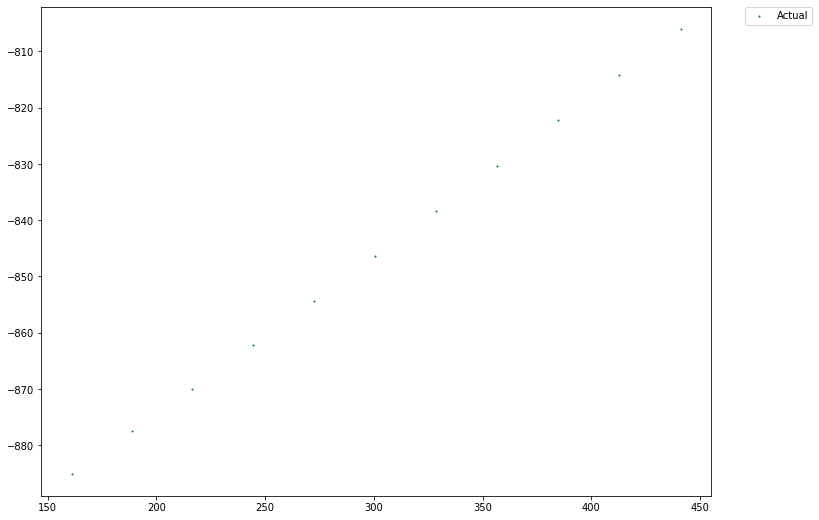

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000   1.000000  0.798629  0.793966
2   0.798629   0.793966  0.597342  0.588301
3   0.597342   0.588301  0.396220  0.383364
4   0.396220   0.383364  0.195348  0.179523
5   0.195348   0.179523 -0.005192 -0.022854


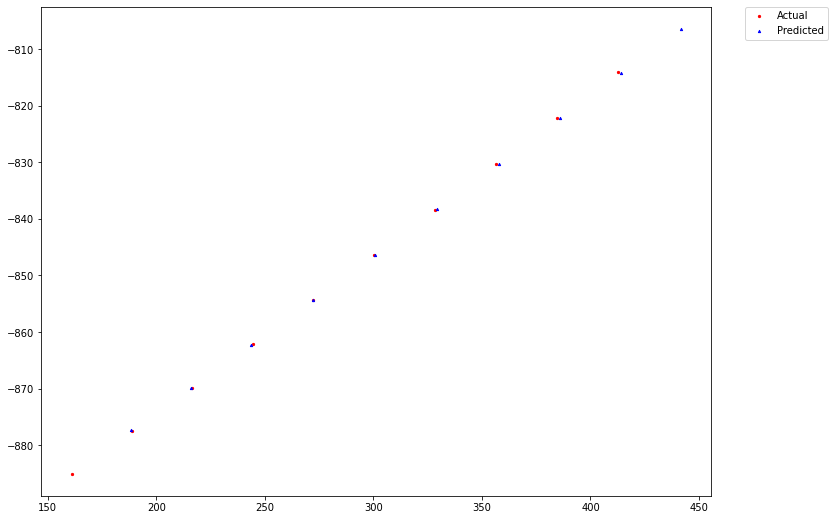

Test RMSE at prediction point 1 : 21.019391
Test RMSE at prediction point 2 : 21.520156
Test RMSE at prediction point 3 : 21.655589
Test RMSE at prediction point 4 : 21.510114
Test RMSE at prediction point 5 : 21.175111
Test RMSE at prediction point 6 : 20.745784
Test RMSE at prediction point 7 : 20.317584
Test RMSE at prediction point 8 : 19.983426
Test RMSE at prediction point 9 : 19.829908
Test RMSE at prediction point 10 : 19.935218
Average of RMSE : 23.076920


In [374]:
traj000 =traj13.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

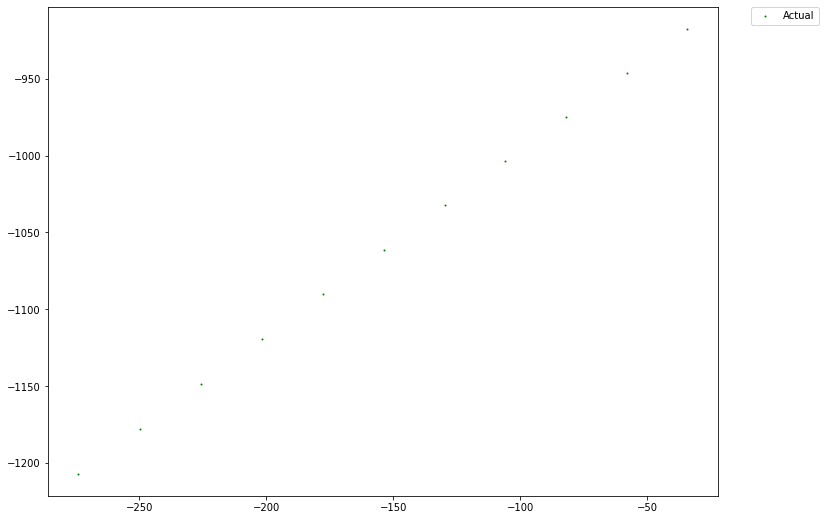

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -1.000000 -0.799144 -0.798108
2  -0.799144  -0.798108 -0.598340 -0.596333
3  -0.598340  -0.596333 -0.397639 -0.394785
4  -0.397639  -0.394785 -0.197095 -0.193581
5  -0.197095  -0.193581  0.003242  0.007164
Test RMSE: 26.343667


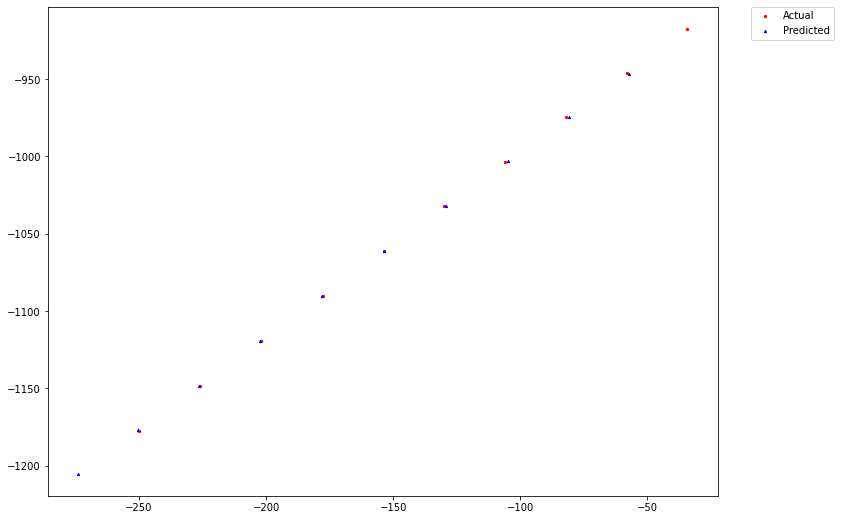

In [218]:
traj000 =traj14.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

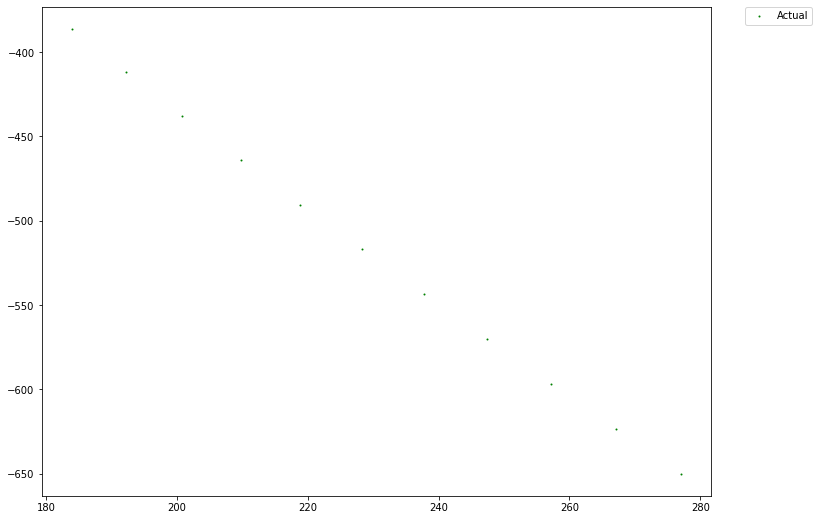

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.787281 -0.797576
2   0.787281  -0.797576  0.575333 -0.595299
3   0.575333  -0.595299  0.364926 -0.393315
4   0.364926  -0.393315  0.156832 -0.191772
5   0.156832  -0.191772 -0.048179  0.009182


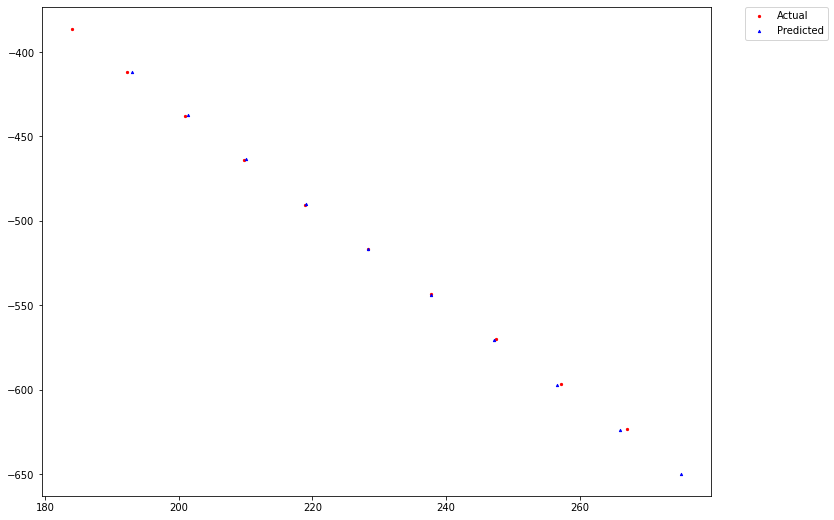

Test RMSE at prediction point 1 : 19.500133
Test RMSE at prediction point 2 : 20.184548
Test RMSE at prediction point 3 : 20.460531
Test RMSE at prediction point 4 : 20.416634
Test RMSE at prediction point 5 : 20.151188
Test RMSE at prediction point 6 : 19.767282
Test RMSE at prediction point 7 : 19.367193
Test RMSE at prediction point 8 : 19.047832
Test RMSE at prediction point 9 : 18.896064
Test RMSE at prediction point 10 : 18.985233
Average of RMSE : 21.864071


In [375]:
traj000 =traj15.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

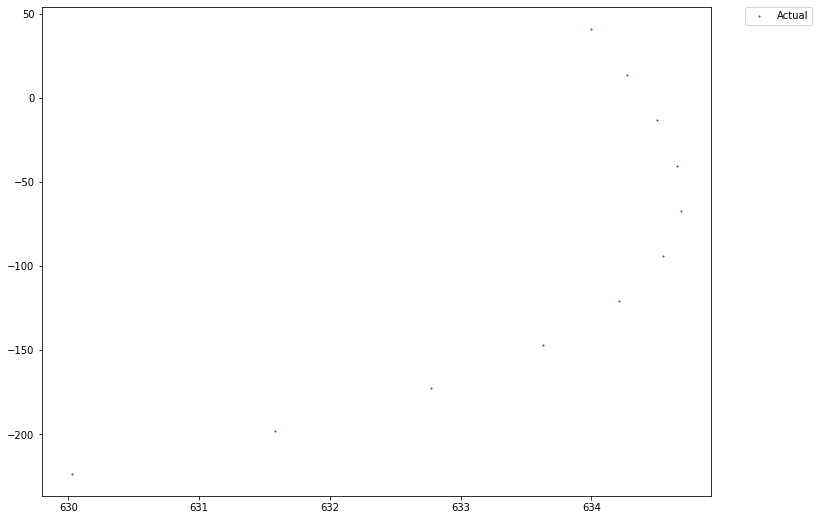

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.706665   1.000000  0.823547  0.793996
2   0.823547   0.793996  0.923035  0.588356
3   0.923035   0.588356  0.987671  0.383443
4   0.987671   0.383443  1.000000  0.179622
5   1.000000   0.179622  0.942596 -0.022743


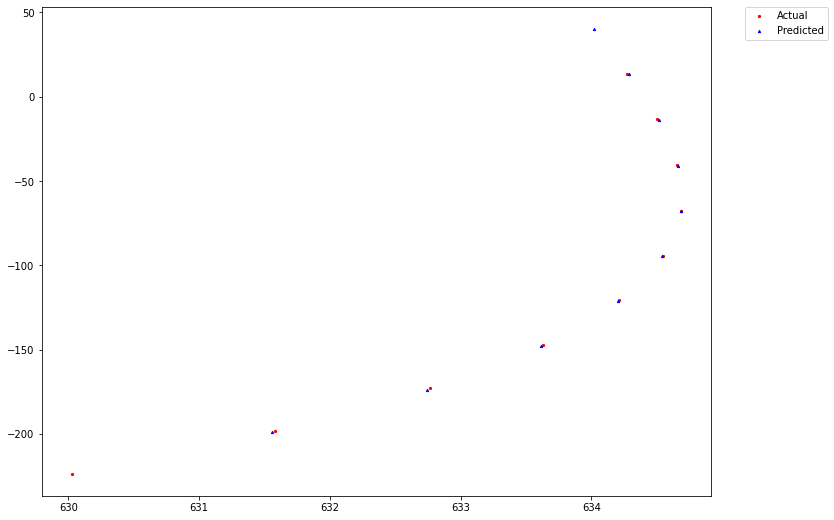

Test RMSE at prediction point 1 : 18.775793
Test RMSE at prediction point 2 : 18.865470
Test RMSE at prediction point 3 : 18.845450
Test RMSE at prediction point 4 : 18.769946
Test RMSE at prediction point 5 : 18.653943
Test RMSE at prediction point 6 : 18.474376
Test RMSE at prediction point 7 : 18.193644
Test RMSE at prediction point 8 : 17.811990
Test RMSE at prediction point 9 : 17.453664
Test RMSE at prediction point 10 : 17.483452
Average of RMSE : 20.369748


In [376]:
traj000 =traj16.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

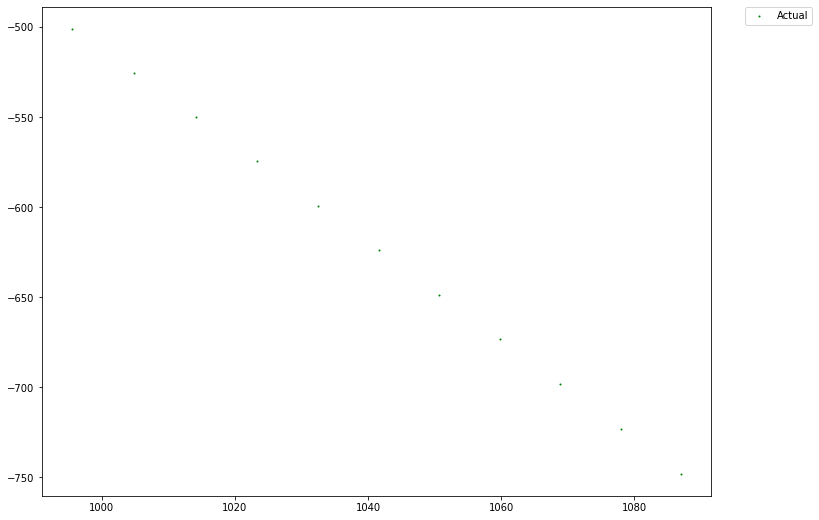

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.802160 -0.798751
2   0.802160  -0.798751  0.604189 -0.597577
3   0.604189  -0.597577  0.405954 -0.396555
4   0.405954  -0.396555  0.207329 -0.195760
5   0.207329  -0.195760  0.008179  0.004732


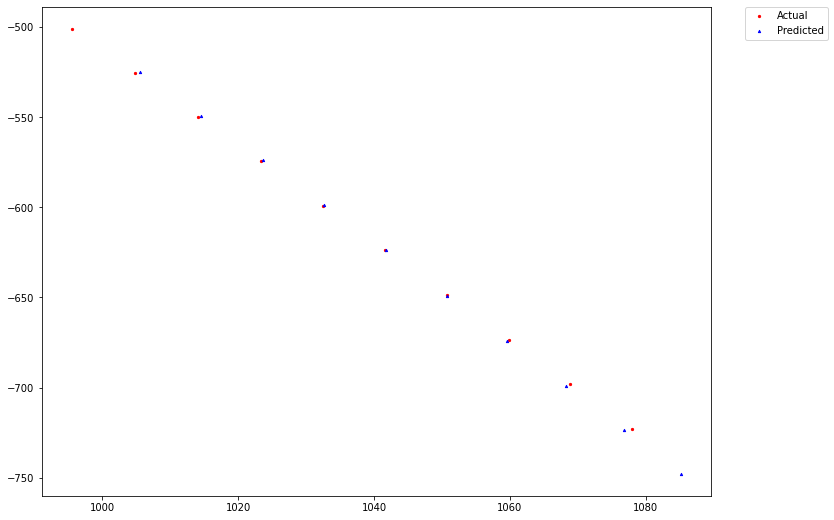

Test RMSE at prediction point 1 : 18.099313
Test RMSE at prediction point 2 : 18.739828
Test RMSE at prediction point 3 : 19.035264
Test RMSE at prediction point 4 : 19.059280
Test RMSE at prediction point 5 : 18.893349
Test RMSE at prediction point 6 : 18.624578
Test RMSE at prediction point 7 : 18.343560
Test RMSE at prediction point 8 : 18.141297
Test RMSE at prediction point 9 : 18.107001
Test RMSE at prediction point 10 : 18.325571
Average of RMSE : 20.596560


In [377]:
traj000 =traj17.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

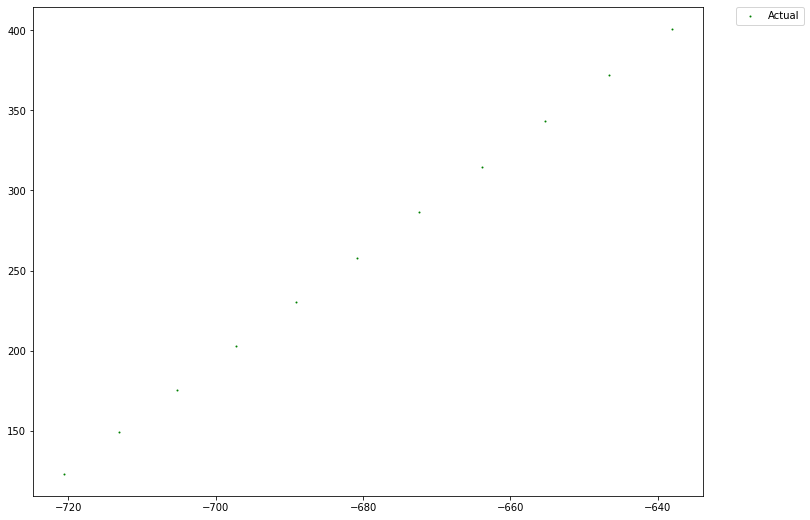

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000   1.000000  0.790394  0.792424
2   0.790394   0.792424  0.581368  0.585308
3   0.581368   0.585308  0.373508  0.379110
4   0.373508   0.379110  0.167395  0.174289
5   0.167395   0.174289 -0.036390 -0.028695


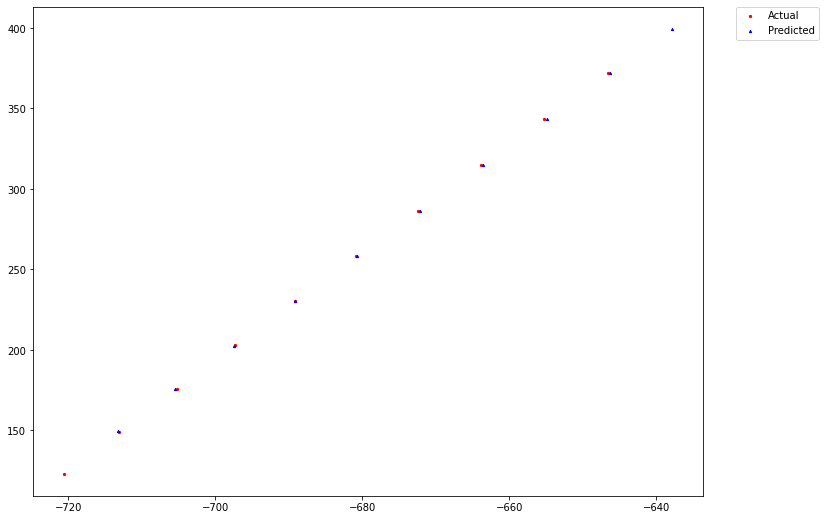

Test RMSE at prediction point 1 : 20.254576
Test RMSE at prediction point 2 : 20.994106
Test RMSE at prediction point 3 : 21.299805
Test RMSE at prediction point 4 : 21.266467
Test RMSE at prediction point 5 : 20.996440
Test RMSE at prediction point 6 : 20.594924
Test RMSE at prediction point 7 : 20.164211
Test RMSE at prediction point 8 : 19.798732
Test RMSE at prediction point 9 : 19.580753
Test RMSE at prediction point 10 : 19.576802
Average of RMSE : 22.725202


In [378]:
traj000 =traj18.iloc[0:11,:]

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))

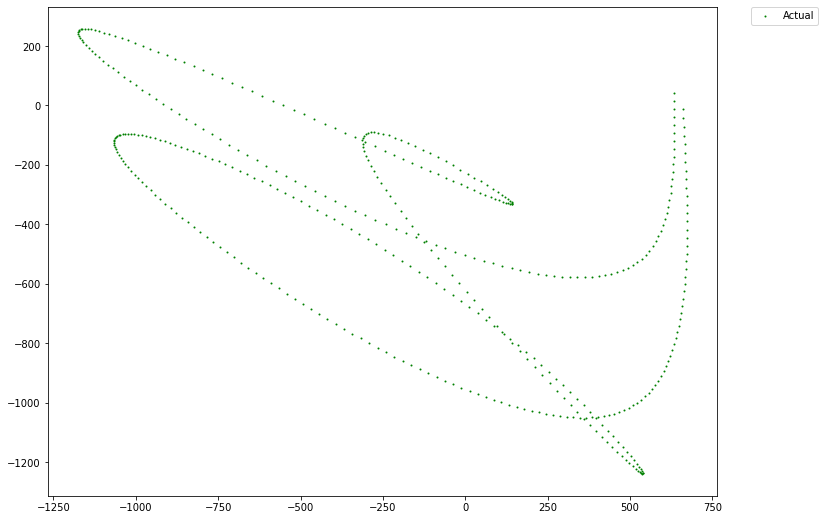

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.957992   0.710544  0.958287  0.674102
2   0.958287   0.674102  0.958537  0.637725
3   0.958537   0.637725  0.958700  0.601477
4   0.958700   0.601477  0.958731  0.565422
5   0.958731   0.565422  0.958587  0.529624


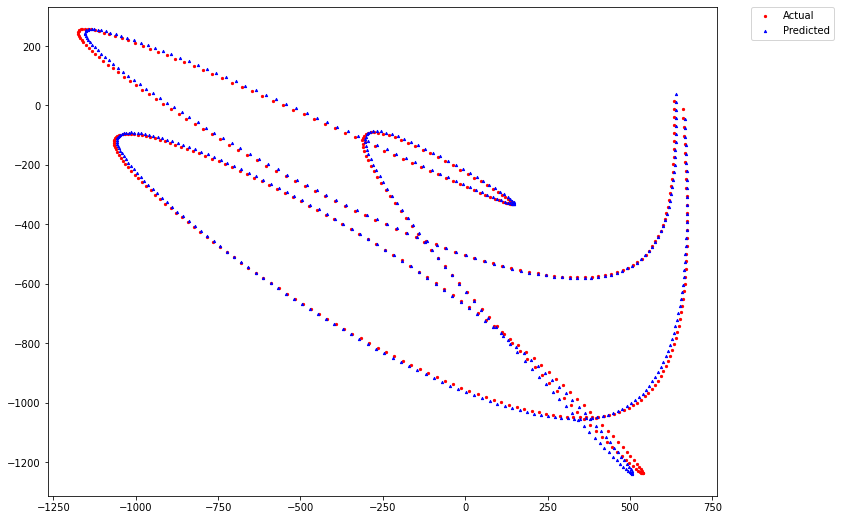

Test RMSE at prediction point 1 : 16.917442
Test RMSE at prediction point 2 : 17.096877
Test RMSE at prediction point 3 : 17.220234
Test RMSE at prediction point 4 : 17.288681
Test RMSE at prediction point 5 : 17.303686
Test RMSE at prediction point 6 : 17.267001
Test RMSE at prediction point 7 : 17.180267
Test RMSE at prediction point 8 : 17.045417
Test RMSE at prediction point 9 : 16.864669
Test RMSE at prediction point 10 : 16.639896
Test RMSE at prediction point 11 : 16.373671
Test RMSE at prediction point 12 : 16.068408
Test RMSE at prediction point 13 : 15.726966
Test RMSE at prediction point 14 : 15.352541
Test RMSE at prediction point 15 : 14.948783
Test RMSE at prediction point 16 : 14.519918
Test RMSE at prediction point 17 : 14.071114
Test RMSE at prediction point 18 : 13.608561
Test RMSE at prediction point 19 : 13.139710
Test RMSE at prediction point 20 : 12.673993
Test RMSE at prediction point 21 : 12.222943
Test RMSE at prediction point 22 : 11.800627
Test RMSE at predic

In [379]:
traj000 =traj16

fig = plt.figure(figsize=(12,9))
plt.scatter(traj000['X'],traj000['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


new_df = traj000

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())



reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y


import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=5,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=5,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#
# calculate RMSE
r = 0
for x in range(0, traj000.shape[0]-1):
    rmse = sqrt(mean_squared_error(inv_yhat[x], inv_y[x]))
    r = rmse+r
    print('Test RMSE at prediction point %d : %.6f' %(x+1,rmse))
r = r/(x)

print('Average of RMSE : %.6f' %(r))